# **1. Importing and Inspecting the Dataset**

In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
valakhorasani_gym_members_exercise_dataset_path = kagglehub.dataset_download('valakhorasani/gym-members-exercise-dataset')

print('Data source import complete.')


100%|██████████| 21.6k/21.6k [00:00<00:00, 25.7MB/s]

Extracting files...
Data source import complete.


In [3]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
import os
csv_file_path = os.path.join(valakhorasani_gym_members_exercise_dataset_path, 'gym_members_exercise_tracking.csv')
df = pd.read_csv(csv_file_path)
df = df.dropna()
df

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

# **2. Data Wrangling: Getting Insights About the Dataset**

In [ ]:
#Displaying Basic Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

We can see there are **15 columns**: Age, Gender, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Session_Duration (hours), Calories_Burned, Workout_Type, Fat_Percentage, Water_Intake (litres), Workout_Frequency (days/week), Experience_Level, BMI. Also, there are a total of 973 instances (rows) in our dataset.

In [ ]:
#Describing the dataset
df.describe(include = "all")

Age Gender  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count   973.000000    973   973.000000   973.00000  973.000000  973.000000   
unique         NaN      2          NaN         NaN         NaN         NaN   
top            NaN   Male          NaN         NaN         NaN         NaN   
freq           NaN    511          NaN         NaN         NaN         NaN   
mean     38.683453    NaN    73.854676     1.72258  179.883864  143.766701   
std      12.180928    NaN    21.207500     0.12772   11.525686   14.345101   
min      18.000000    NaN    40.000000     1.50000  160.000000  120.000000   
25%      28.000000    NaN    58.100000     1.62000  170.000000  131.000000   
50%      40.000000    NaN    70.000000     1.71000  180.000000  143.000000   
75%      49.000000    NaN    86.000000     1.80000  190.000000  156.000000   
max      59.000000    NaN   129.900000     2.00000  199.000000  169.000000   

        Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  \
count    973.000000                973.000000       973.000000          973   
unique          NaN                       NaN              NaN            4   
top             NaN                       NaN              NaN     Strength   
freq            NaN                       NaN              NaN          258   
mean      62.223022                  1.256423       905.422405          NaN   
std        7.327060                  0.343033       272.641516          NaN   
min       50.000000                  0.500000       303.000000          NaN   
25%       56.000000                  1.040000       720.000000          NaN   
50%       62.000000                  1.260000       893.000000          NaN   
75%       68.000000                  1.460000      1076.000000          NaN   
max       74.000000                  2.000000      1783.000000          NaN   

        Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
count       973.000000             973.000000                     973.000000   
unique             NaN                    NaN                            NaN   
top                NaN                    NaN                            NaN   
freq               NaN                    NaN                            NaN   
mean         24.976773               2.626619                       3.321686   
std           6.259419               0.600172                       0.913047   
min          10.000000               1.500000                       2.000000   
25%          21.300000               2.200000                       3.000000   
50%          26.200000               2.600000                       3.000000   
75%          29.300000               3.100000                       4.000000   
max          35.000000               3.700000                       5.000000   

        Experience_Level         BMI  
count         973.000000  973.000000  
unique               NaN         NaN  
top                  NaN         NaN  
freq                 NaN         NaN  
mean            1.809866   24.912127  
std             0.739693    6.660879  
min             1.000000   12.320000  
25%             1.000000   20.110000  
50%             2.000000   24.160000  
75%             2.000000   28.560000  
max             3.000000   49.840000

We can observe that the maximum instances in our dataset represent the "**male**" **Gender**. The most frequent **Workout_Type** in our dataset is "**Strenght**"

In [ ]:
#Checking the number if unique entries for each column in our dataset
df.nunique()

Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           40
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         147
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              771
dtype: int64

So, we can see that our dataset contains **2** unique **Gender** values (Male and Female). It contains **42** unique values for the **Age** column. There are **4** different **Workout_Types** in our dataset. We also have **4** unique values for **Workout_Frequency (days/week)**. There are **3** different "**Experience_Level**" in our dataset.

# **3. Handling Duplicates and Missing Values**

## **3.1 Handling Dupliactes**

In [ ]:
#Removing duplicate instances from our dataset
df.drop_duplicates(inplace=True)
df

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [ ]:
#Checking the number of instances in the dataset after removing duplicates
df.shape

(973, 15)

As we can see that there are still **973 instances** in our dataset. This means that there were no duplicate instances present in our dataset.

## **3.2 Handling Missing Values**

In [ ]:
#Checking for missing values in the dataset
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

This means that all the columns in this dataset are free from any null values. There are **NO MISSING VALUES.**

So we don't need to handle missing values in this dataset.

# **4. Data Visualization**

## **4.1 Univariate Analysis**

### **4.1.1 Plotting Histogram for Each of the features**

(array([ 98., 243., 351., 191.,  76.,  14.]),
 array([ 303.        ,  549.66666667,  796.33333333, 1043.        ,
        1289.66666667, 1536.33333333, 1783.        ]),
 <BarContainer object of 6 artists>)

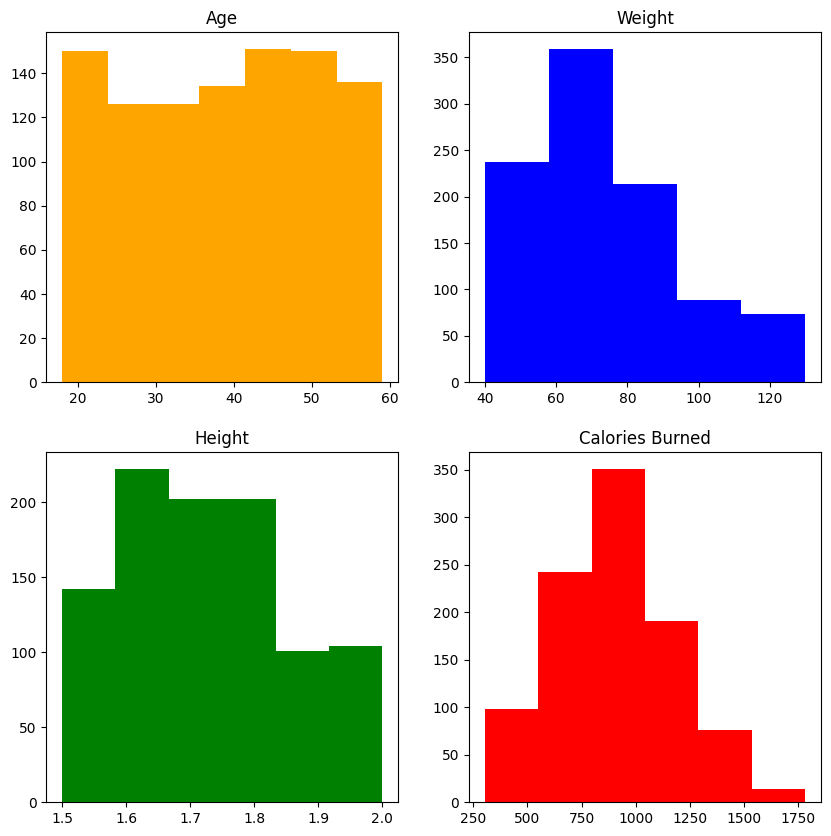

In [ ]:
#Creating subplot
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(nrows=2, ncols=2)

#Creating histogram for 'Age'
axes[0,0].set_title("Age")
axes[0,0].hist(df['Age'], bins=7, color = 'orange')

#Creating histogram for 'Weight (kg)'
axes[0,1].set_title("Weight")
axes[0,1].hist(df['Weight (kg)'], bins=5, color = 'blue')

#Creating histogram for 'Height (m)'
axes[1,0].set_title("Height")
axes[1,0].hist(df['Height (m)'], bins=6, color = 'green')

#Creating histogram for 'Calories_Burned'
axes[1,1].set_title("Calories Burned")
axes[1,1].hist(df['Calories_Burned'], bins=6, color = 'red')

(array([ 85., 101., 279., 312.,  92., 104.]),
 array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
 <BarContainer object of 6 artists>)

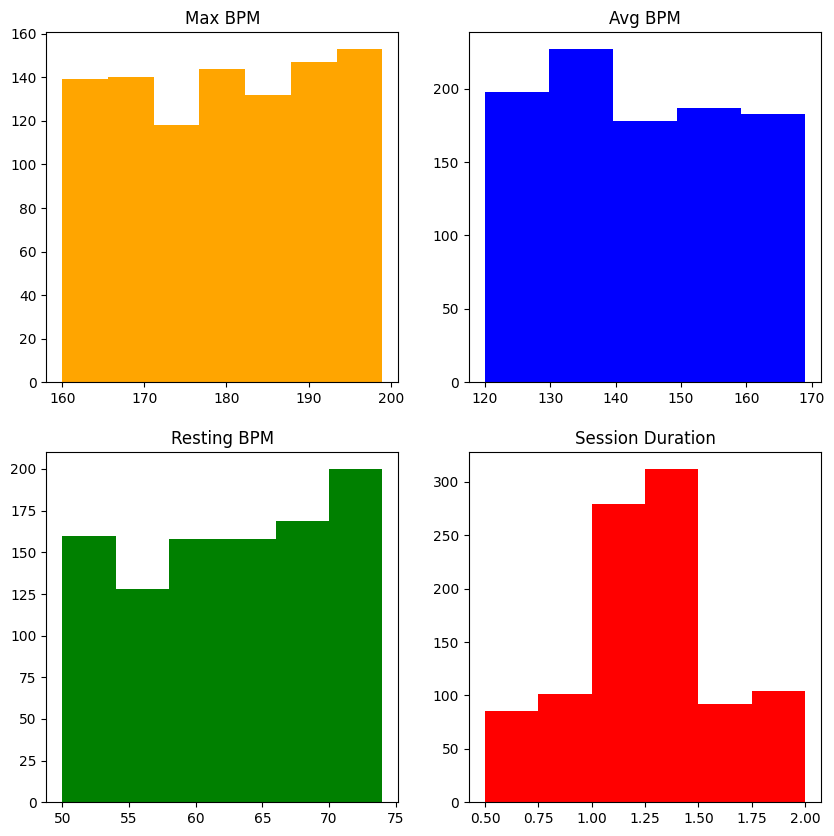

In [ ]:
#Creating subplot
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(nrows=2, ncols=2)

#Creating histogram for 'Max_BPM'
axes[0,0].set_title("Max BPM")
axes[0,0].hist(df['Max_BPM'], bins=7, color = 'orange')

#Creating histogram for 'Avg_BPM'
axes[0,1].set_title("Avg BPM")
axes[0,1].hist(df['Avg_BPM'], bins=5, color = 'blue')

#Creating histogram for 'Resting_BPM'
axes[1,0].set_title("Resting BPM")
axes[1,0].hist(df['Resting_BPM'], bins=6, color = 'green')

#Creating histogram for 'Session_Duration (hours)'
axes[1,1].set_title("Session Duration")
axes[1,1].hist(df['Session_Duration (hours)'], bins=6, color = 'red')

(array([170., 358., 293., 102.,  35.,  15.]),
 array([12.32      , 18.57333333, 24.82666667, 31.08      , 37.33333333,
        43.58666667, 49.84      ]),
 <BarContainer object of 6 artists>)

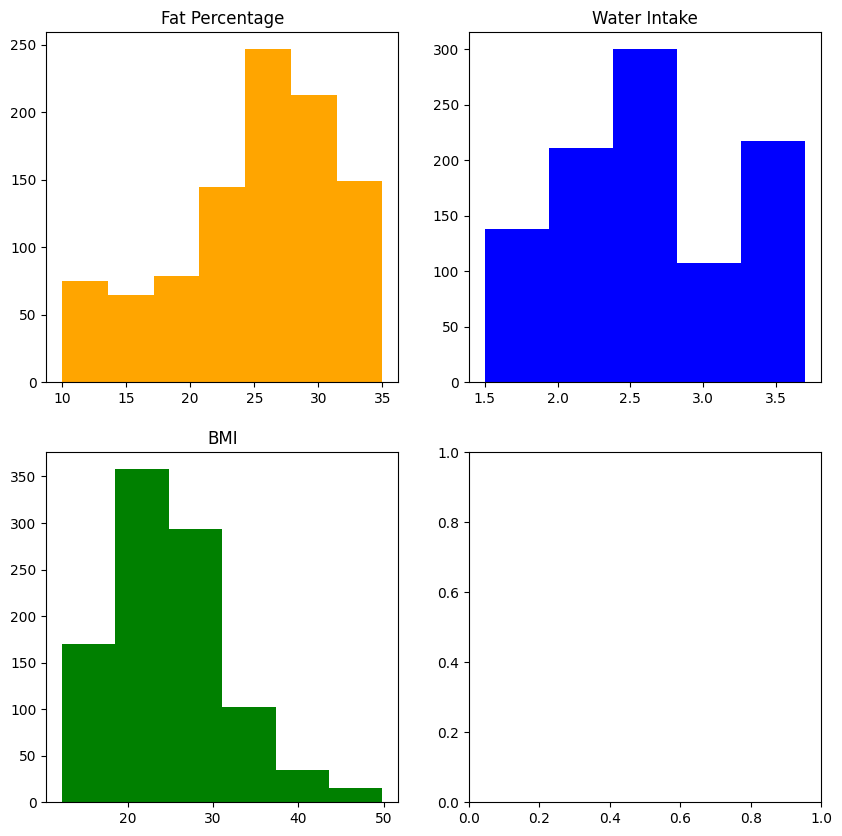

In [ ]:
#Creating subplot
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(nrows=2, ncols=2)

#Creating histogram for 'Fat_Percentage'
axes[0,0].set_title("Fat Percentage")
axes[0,0].hist(df['Fat_Percentage'], bins=7, color = 'orange')

#Creating histogram for 'Water_Intake (liters)'
axes[0,1].set_title("Water Intake")
axes[0,1].hist(df['Water_Intake (liters)'], bins=5, color = 'blue')

#Creating histogram for 'BMI'
axes[1,0].set_title("BMI")
axes[1,0].hist(df['BMI'], bins=6, color = 'green')


### **4.1.2 Distribution plots for all the features**

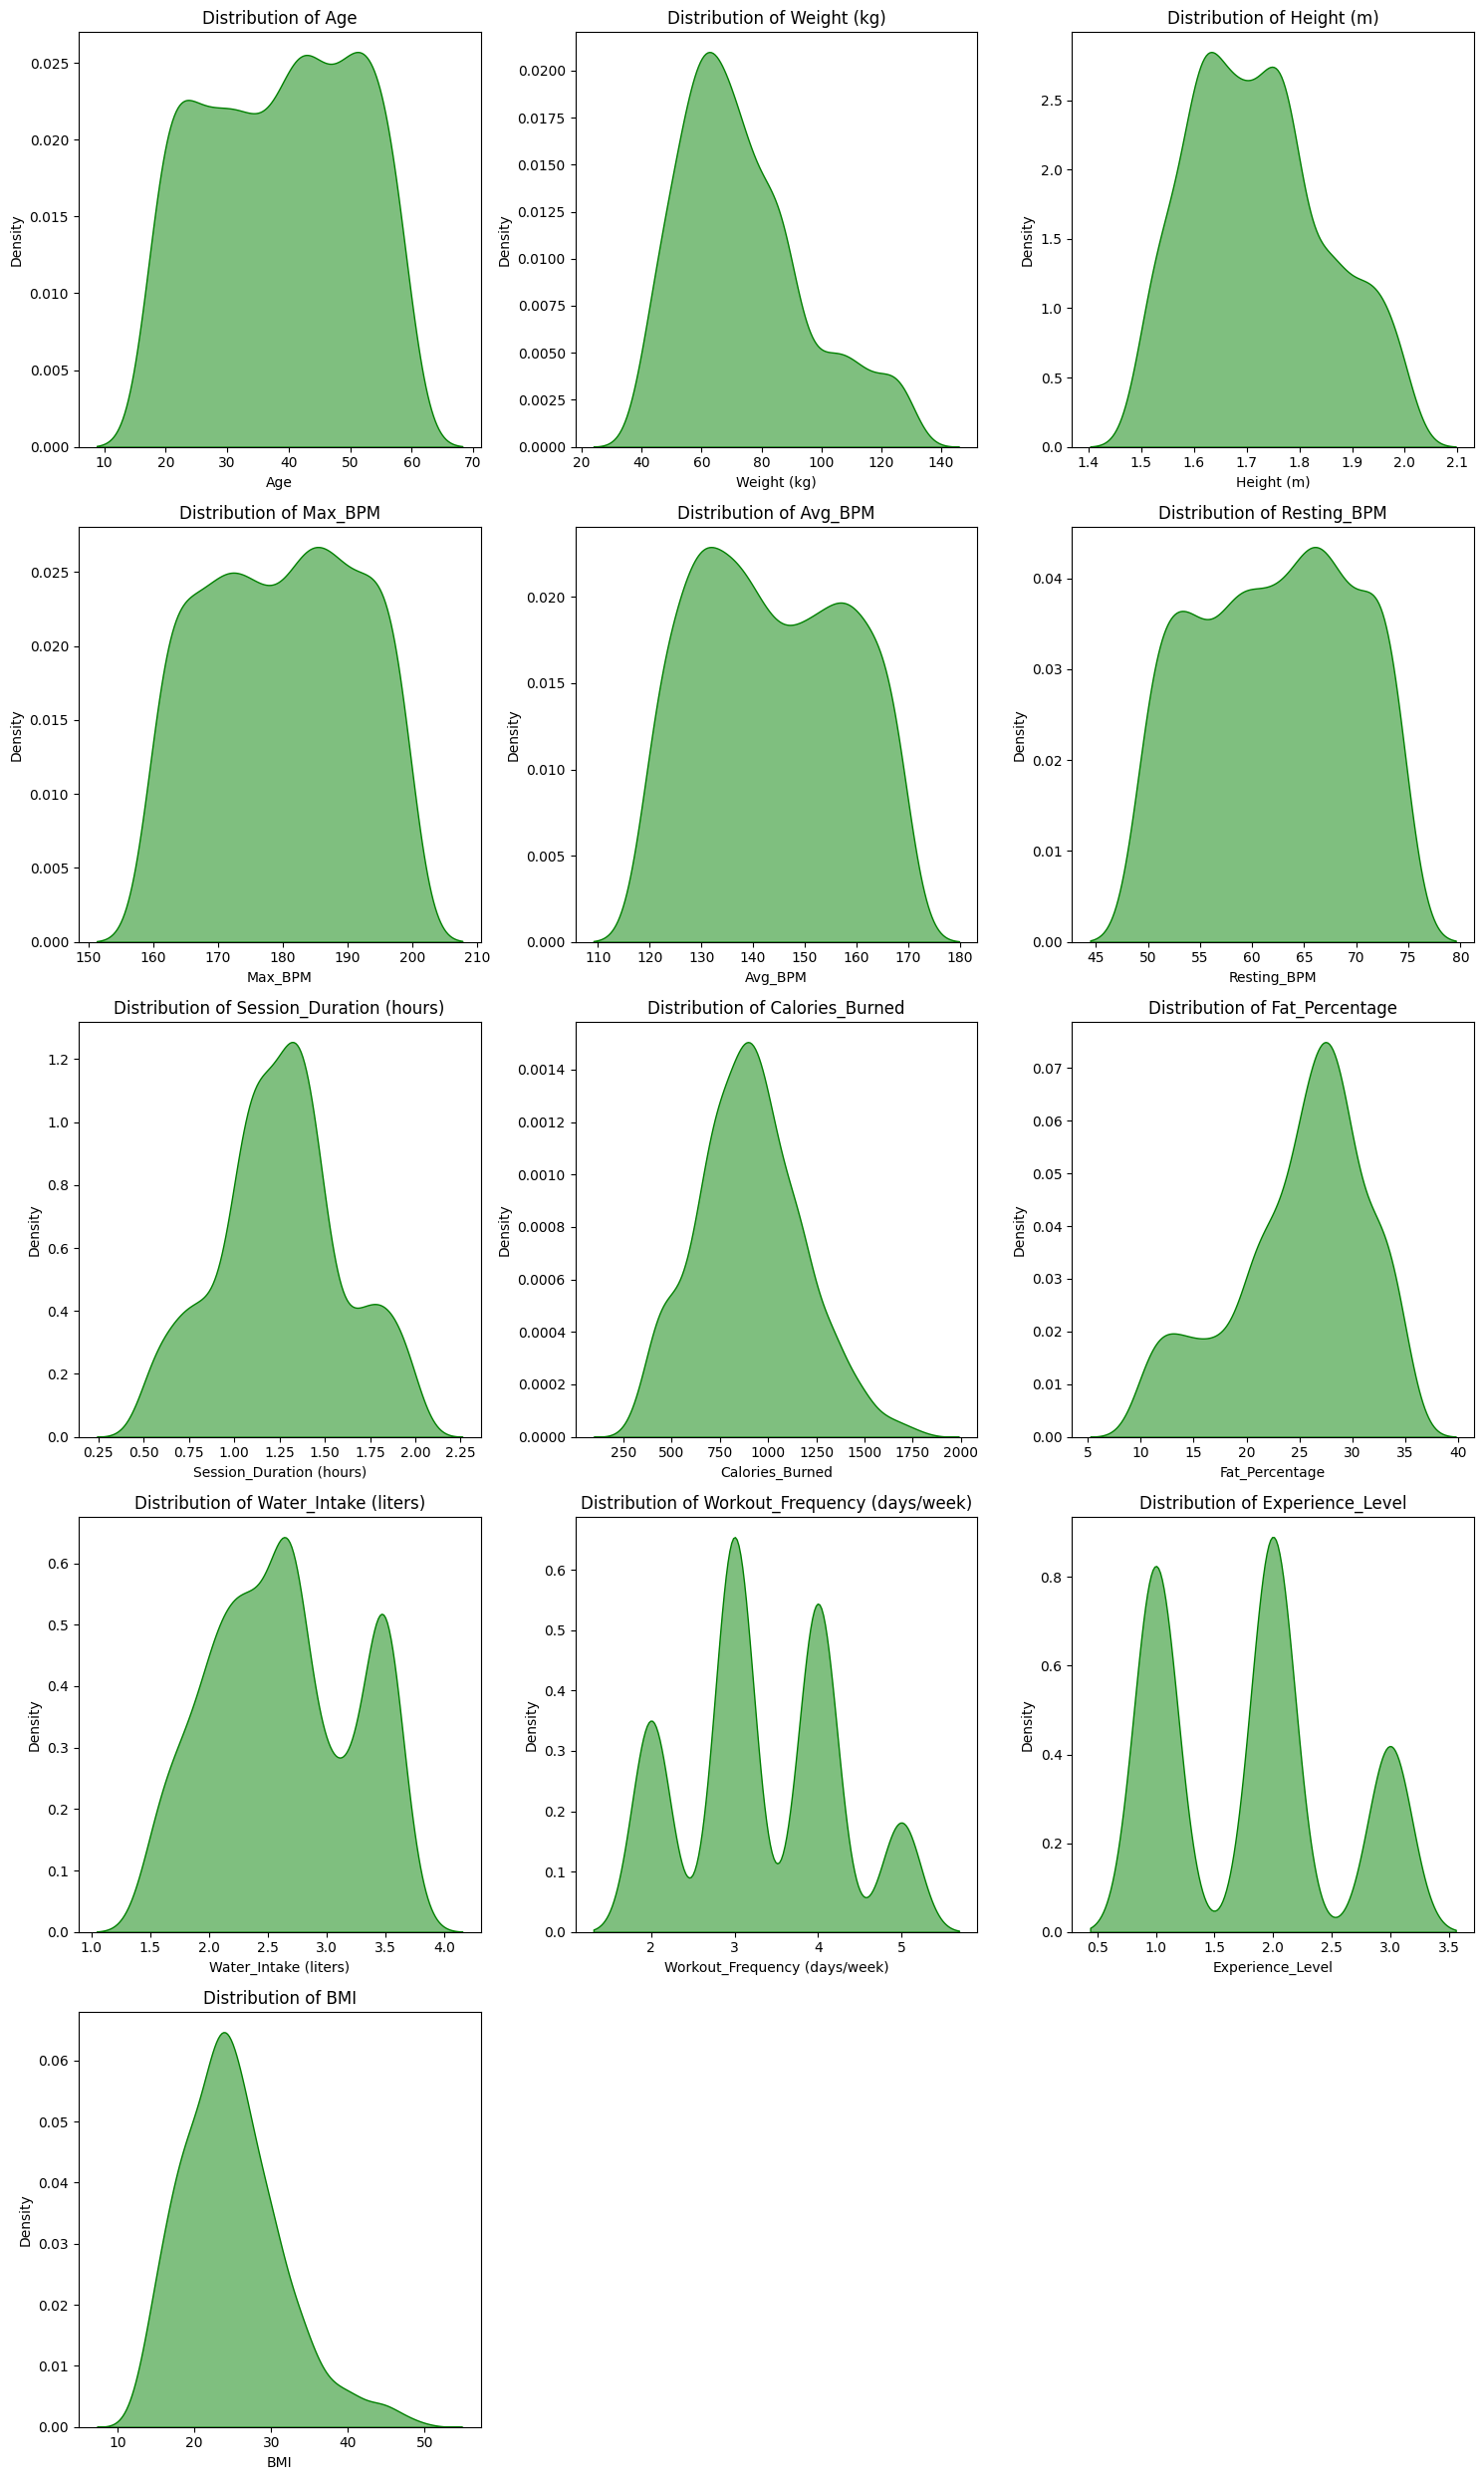

In [ ]:
#Identifying numerical columns in the DataFrame
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

#Setting up the grid for subplots
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

#Creating subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

#Flattening the axes array
axes = axes.flatten()

#Plotting KDE plots for each numerical feature
for idx, feature in enumerate(numerical_features):
    sns.kdeplot(
        df[feature],
        ax=axes[idx],
        fill=True,
        color="green",
        alpha=0.5
    )
    axes[idx].set_title(f"Distribution of {feature}")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Density")

#Removing unused subplots if the grid is larger than the number of features
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

#Adjust layout
plt.tight_layout()
plt.show()

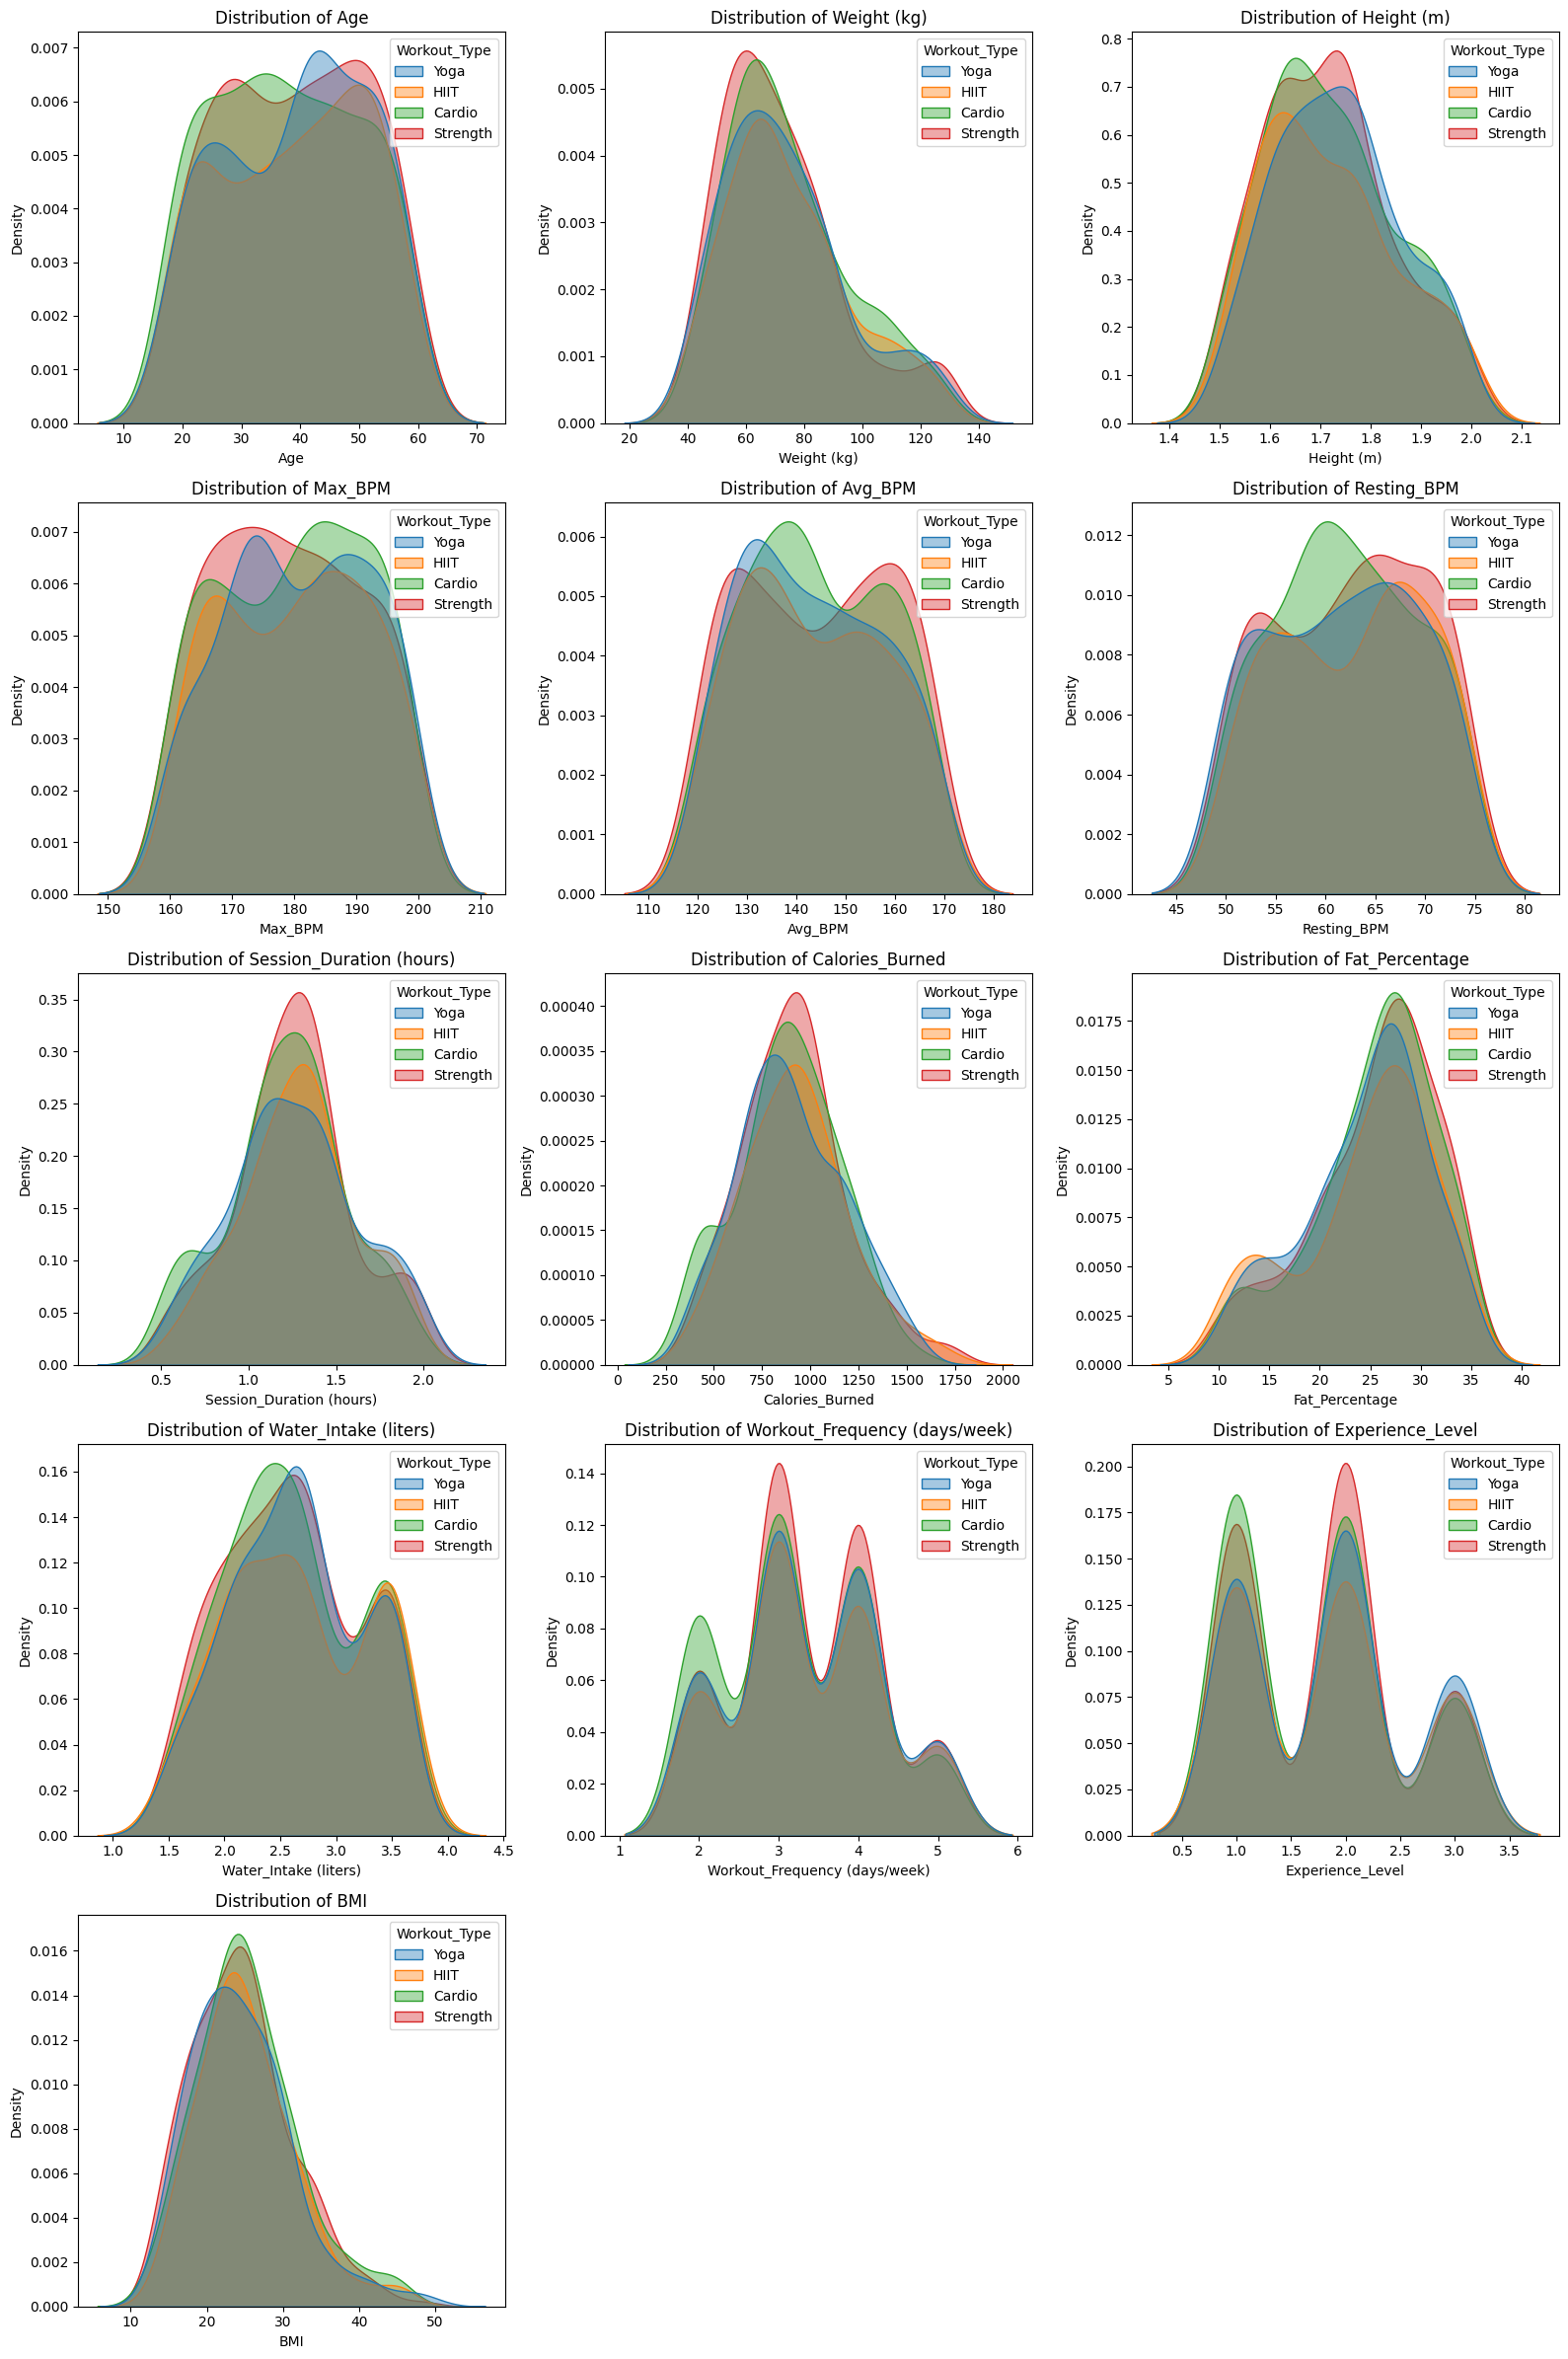

In [ ]:
#Selecting numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

#Setting up the plot grid
plt.figure(figsize=(16, 24))
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.kdeplot(data=df, x=column, hue='Workout_Type', fill=True, alpha=0.4, palette='tab10')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### **4.1.3 Countplot: Gender**

In [ ]:
#Checking the counts of each Gender (Male and Female)
df.value_counts("Gender")

Gender
Male      511
Female    462
Name: count, dtype: int64

As we can see, the dataset is not balanced in terms of "Gender" column. Number of instances belonging to **Gender = Male** is **greater than** number of instances belonging to **Gender = Female**.

<ipython-input-16-035e3e49ed01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Gender", data = df, palette = "husl")


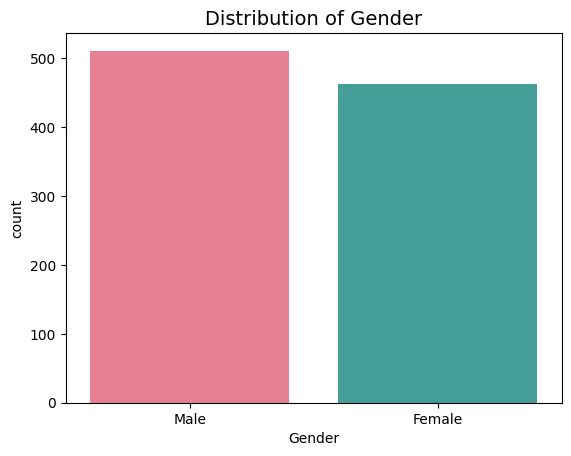

In [ ]:
#Plotiing countplot for Gender
sns.countplot(x = "Gender", data = df, palette = "husl")
plt.title('Distribution of Gender', fontsize=14)
plt.show()

We can see from the above plot that our dataset is **UNBALANCED** in terms of "**Gender**" column.

### **4.1.4 Countplot: Workout_Type**

In [ ]:
#Checking the counts of each Workout_Type (Strength, Cardio, Yoga, and HIIT)
df.value_counts("Workout_Type")

Workout_Type
Strength    258
Cardio      255
Yoga        239
HIIT        221
Name: count, dtype: int64

As we can see, the dataset is not balanced in terms of "Workout_Type" column as well. Number of instances belonging to **Workout_Type = Strength** is the **greatest**. The number of instances belonging to **Workout_Type = HIIT** is the **least**.

<ipython-input-18-ddabe0c1c76b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Workout_Type", data = df, palette = "husl")


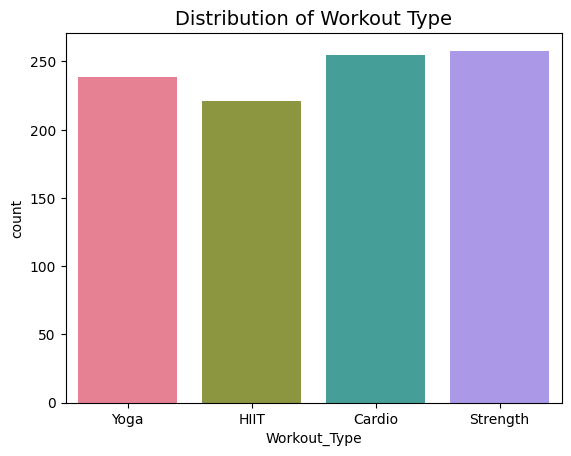

In [ ]:
#Plotiing countplot for Workout_Type
sns.countplot(x = "Workout_Type", data = df, palette = "husl")
plt.title('Distribution of Workout Type', fontsize=14)
plt.show()

We can see from the above plot that our dataset is **UNBALANCED** in terms of "**Workout_Type**" column.

### **4.1.5 Countplot: Workout_Frequency (days/week)**

In [ ]:
#Checking the counts of each Workout_Frequency (3 days/week, 4 days/week, 2 days/week, and 5 days/week)
df.value_counts("Workout_Frequency (days/week)")

Workout_Frequency (days/week)
3    368
4    306
2    197
5    102
Name: count, dtype: int64

As we can see, the dataset is not balanced in terms of " Workout_Frequency (days/week)" column as well. Number of instances belonging to **Workout_Frequency (days/week) = 3** is the **greatest**. This means most people workout 3 days a week. The number of instances belonging to **Workout_Frequency (days/week) = 5** is the **least**. This means that very few people workout out 5 days a week.

<ipython-input-20-8a8b38fea742>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Workout_Frequency (days/week)", data = df, palette = "husl")


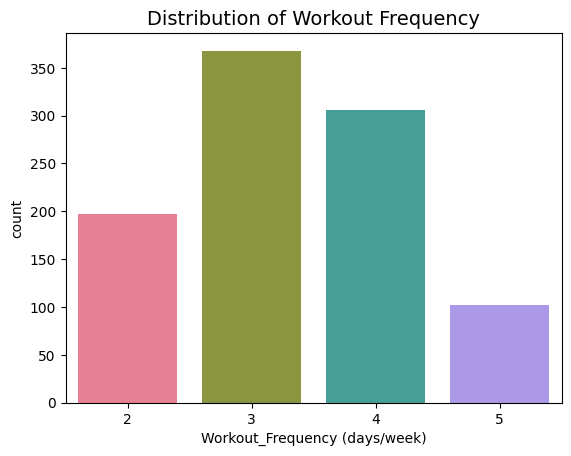

In [ ]:
#Plotiing countplot for Workout_Frequency (days/week)
sns.countplot(x = "Workout_Frequency (days/week)", data = df, palette = "husl")
plt.title('Distribution of Workout Frequency', fontsize=14)
plt.show()

We can see from the above plot that our dataset is **UNBALANCED** in terms of "**Workout_Frequency (days/week)**" column.

### **4.1.6 Countplot: Experience_Level**

In [ ]:
#Checking the counts of each Experience_Level (1, 2, 3)
df.value_counts("Experience_Level")

Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64

As we can see, the dataset is not balanced in terms of "Experience_Level" column as well. Number of instances belonging to **Experience_Level = 2** is the **greatest**. This means most people belong to Experience Level 2. The number of instances belonging to **Experience_Level = 3** is the **least**. This means that very few people belong to Experience Level 3.

<ipython-input-22-b7efb4efa400>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Experience_Level", data = df, palette = "husl")


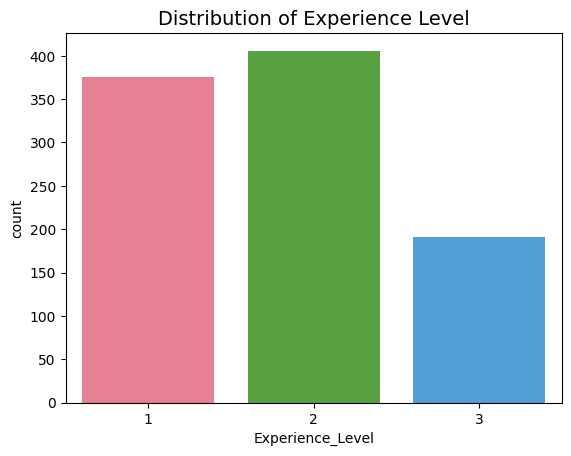

In [ ]:
#Plotiing countplot for Experience_Level
sns.countplot(x = "Experience_Level", data = df, palette = "husl")
plt.title('Distribution of Experience Level', fontsize=14)
plt.show()

We can see from the above plot that our dataset is **UNBALANCED** in terms of "**Experience_Level**" column.

### **4.1.7 Countplot: Age_Group**

In [ ]:
#Creating a copy of the original DataFrame
age_group_df = df.copy()

#Categorizing age groups
bins = [0, 30, 60, 100]
labels_age = ['young', 'middle', 'old']
age_group_df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels_age, right=False)

#Viewing the new dataframe age_group_df
age_group_df

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI Age_Group  
0    30.20    middle  
1    32.00    middle  
2    24.71    middle  
3    18.41     young  
4    14.39    middle  
..     ...       ...  
968  28.77     young  
969  25.69     young  
970  19.50    middle  
971  37.74    middle  
972  33.38    middle  

[973 rows x 16 columns]

In [ ]:
#Checking the counts of each Age_Group (young, middle, old)
age_group_df.value_counts("Age_Group")

Age_Group
middle    697
young     276
old         0
Name: count, dtype: int64

As we can see, the dataset is not balanced in terms of "Age_Group" column as well. Number of people belonging to the "**middle**" age group is the **greatest** (**697**). The number of people belonging to "**old**" age group is the **least** and is in fact **0**. This means that none of the old people workout according to our dataset.

<ipython-input-25-f48ad89c32b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Age_Group", data = age_group_df, palette = "husl")


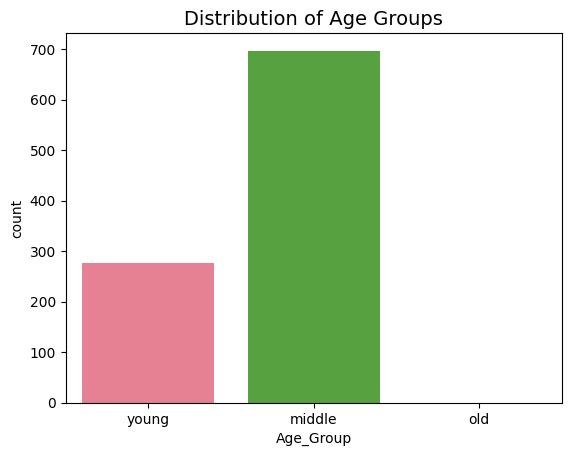

In [ ]:
#Plotiing countplot for Age_Group
sns.countplot(x = "Age_Group", data = age_group_df, palette = "husl")
plt.title('Distribution of Age Groups', fontsize=14)
plt.show()

We can see from the above plot that our dataset is **UNBALANCED** in terms of "**Age_Group**" column. Also, we do not have people beloging to old age group.

### **4.1.8 Countplot: Obesity_Level**

In [ ]:
#Creating a copy of the original DataFrame
obesity_group_df = df.copy()

#Categorizing obesity levels
bins = [0, 18.5 ,25 ,30 ,35 ,40 ,100]
labels_obesity_level = ['Underweight','Normal','Overweight','Obesity I','Obesity II','Obesity III']
obesity_group_df['Obesity_Level'] = pd.cut(df['BMI'], bins=bins, labels=labels_obesity_level, right=False)

#Viewing the new dataframe obesity_group_df
obesity_group_df

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI Obesity_Level  
0    30.20     Obesity I  
1    32.00     Obesity I  
2    24.71        Normal  
3    18.41   Underweight  
4    14.39   Underweight  
..     ...           ...  
968  28.77    Overweight  
969  25.69    Overweight  
970  19.50        Normal  
971  37.74    Obesity II  
972  33.38     Obesity I  

[973 rows x 16 columns]

In [ ]:
#Checking the counts of each Obesity Level ('Underweight','Normal','Overweight','Obesity I','Obesity II','Obesity III')
obesity_group_df.value_counts("Obesity_Level")

Obesity_Level
Normal         370
Overweight     243
Underweight    168
Obesity I      121
Obesity II      37
Obesity III     34
Name: count, dtype: int64

As we can see, the dataset is not balanced in terms of "Obesity_Level" column as well. Number of people belonging to the "**Normal**" Obesity group is the **greatest** (**697**). The number of people belonging to "**Obesity III**" category is the **least**.

<ipython-input-28-d707cd3a35e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=obesity_group_df, x='Obesity_Level', palette='rocket')


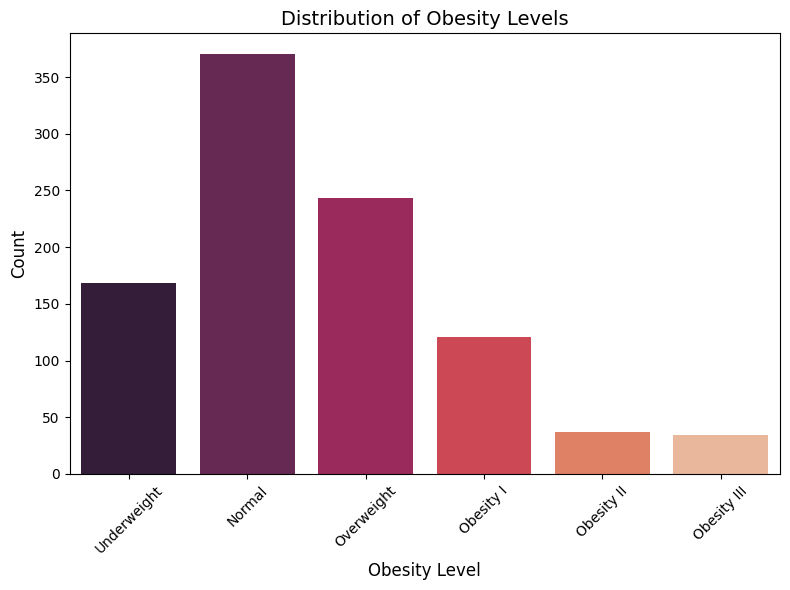

In [ ]:
#Plotting Countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=obesity_group_df, x='Obesity_Level', palette='rocket')
plt.title('Distribution of Obesity Levels', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above count plot, we can infer that the **maximum** number of people in the population belong to the "**Normal**" category of the "**Obesity Level**" feature. Following this, the **second largest** proportion of population belongs to the "**Overweight**" category. After this, the **third largest** proportion of the population belongs to the "**Underweight**" category. There are a **very few** people who belong to the "**Obesity III**" category.

## **4.2 Bi-Variate Analysis: Relation between 2 variables**

### **4.2.1 Barplot: Average Calories Burned by Age Group**

<ipython-input-29-2cc47bf5c5f1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_calories = age_group_df.groupby('Age_Group')['Calories_Burned'].mean().reset_index()
<ipython-input-29-2cc47bf5c5f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_calories, x='Age_Group', y='Calories_Burned', palette='husl')


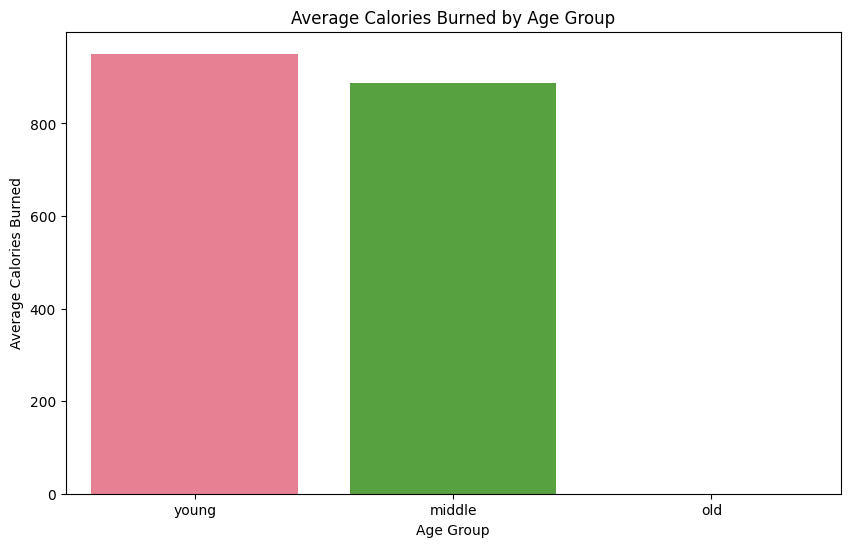

Age_Group  Calories_Burned
0     young       950.496377
1    middle       887.573888
2       old              NaN

In [ ]:
#Calculating Average calories burned by age group
age_group_calories = age_group_df.groupby('Age_Group')['Calories_Burned'].mean().reset_index()

#Plotting the Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_calories, x='Age_Group', y='Calories_Burned', palette='husl')
plt.title('Average Calories Burned by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Calories Burned')
plt.show()

#Viewing the new dataframe age_group_calories
age_group_calories

From the above bar plot, we can infer that the Average Calories Burned by people belonging to the '**young**' age group is **greater than** the people belonging to the '**middle**' age group. (**950.496377 > 887.573888**) We can also see that the Average Burned Calories for people belonging to the '**old**' age group is **0**. This is because our dataset does not contain people belonging to the 'old' age group.

### **4.2.2 Scatter Plot: Calories Burned vs Age Group**

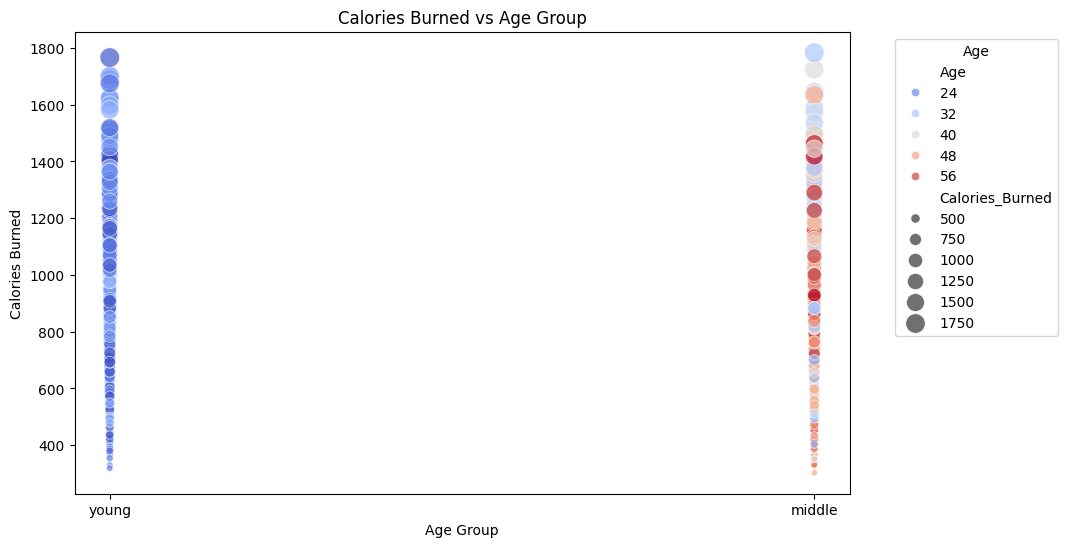

In [ ]:
#Plotting the Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=age_group_df, x='Age_Group', y='Calories_Burned', hue='Age', palette='coolwarm', size='Calories_Burned', sizes=(20, 200), alpha=0.7)
plt.title('Calories Burned vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Calories Burned')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This scatter plot shows the Calories Burned by people belonging to each age group.

### **4.2.3 Barplot: Average Calories Burned by Workout Type**

<ipython-input-31-ecb6d09f352a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=workout_calories, x='Workout_Type', y='Calories_Burned', palette='coolwarm')


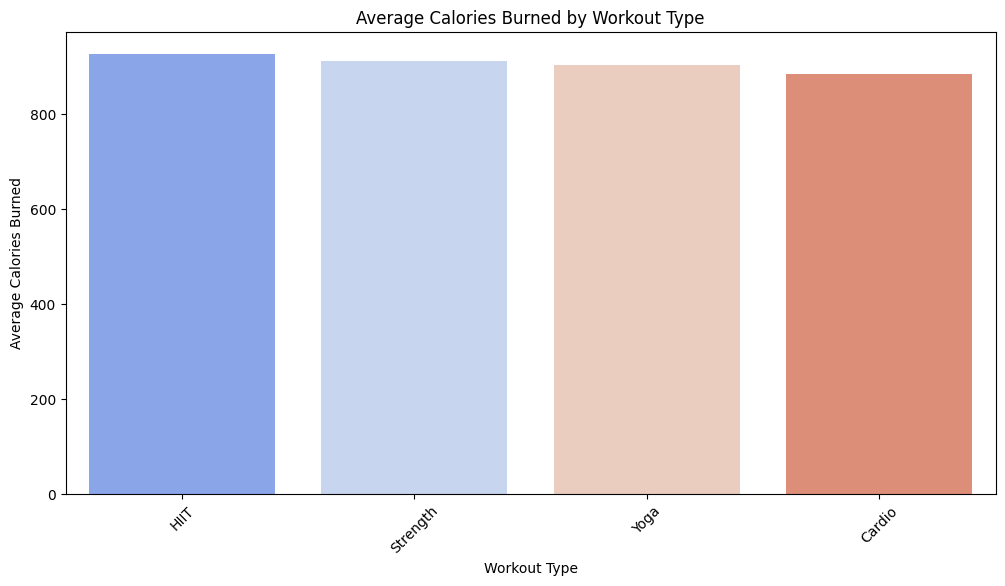

In [ ]:
#Average calories burned by workout type
workout_calories = df.groupby('Workout_Type')['Calories_Burned'].mean().sort_values(ascending=False).reset_index()

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=workout_calories, x='Workout_Type', y='Calories_Burned', palette='coolwarm')
plt.title('Average Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.xticks(rotation=45)
plt.show()

From the above barplot, we can observe that the Workout Type that has the **highest** value for **Average Calories Burned** is "**HIIT**" (High-Intensity-Interval-Training). This means that HIIT helps the most in burning calories. Although there is not much difference compared to other workout types.

### **4.2.4 Catplot: Relationships between Age_Group and Workout_Type (Two categorical features)**

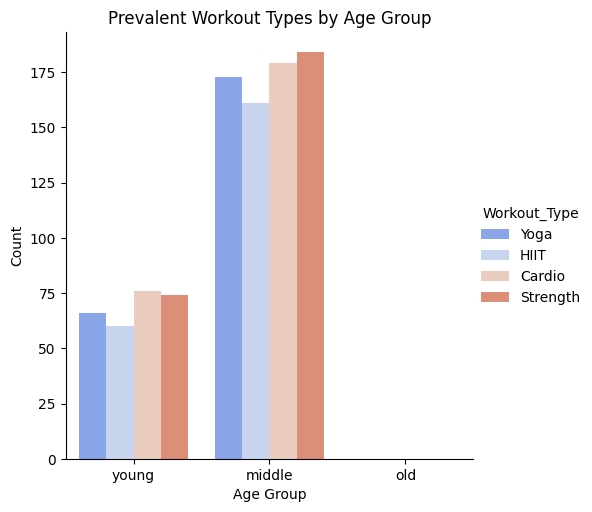

In [ ]:
#Plotting catplot between Age_Group and Workout_Type with kind = count
sns.catplot(x = "Age_Group", hue = "Workout_Type", data = age_group_df, kind = "count", palette = 'coolwarm')

plt.title('Prevalent Workout Types by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

From the above plot, we can notice that among the people belonging to the "**young**" age group, the "**Cardio**" workout type is the most preffered. On the other hand, in the "**middle**" age group, the "**Strength**" workout type is the most preffered.

### **4.2.5 Catplot: Relationships between Gender and Workout_Type (Two categorical features)**

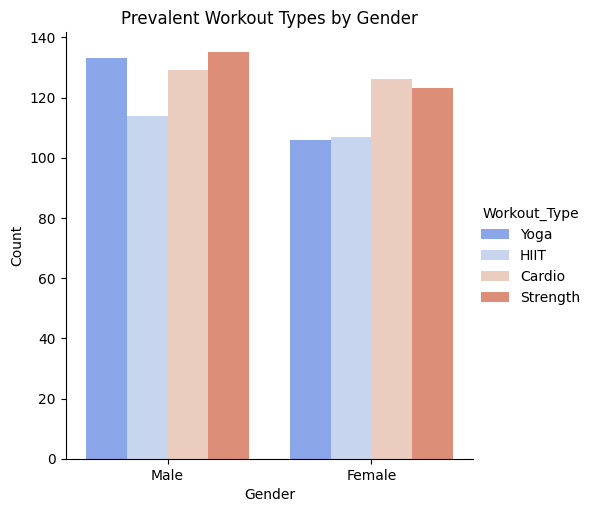

In [ ]:
#Plotting catplot between Gender and Workout_Type with kind = count
sns.catplot(x = "Gender", hue = "Workout_Type", data = df, kind = "count", palette = 'coolwarm')

plt.title('Prevalent Workout Types by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

From the above catplot, We can observe that the most prevalent Workout Type among "**Male**" gender is "**Strength**". While on the other hand, for the "**Female**" population, the most prevalent Workout Type is "**Cardio**".

### **4.2.6 Barplot: Average Water Intake by Age Groups**

<ipython-input-34-32aa2911cf11>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  water_intake_avg = age_group_df.groupby('Age_Group')['Water_Intake (liters)'].mean().reset_index()
<ipython-input-34-32aa2911cf11>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=water_intake_avg, x='Age_Group', y='Water_Intake (liters)', palette='cool')


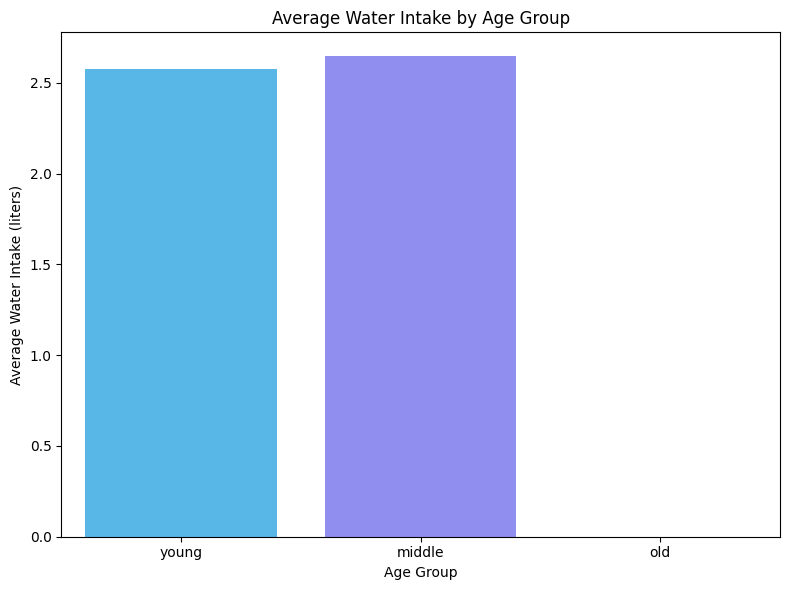

In [ ]:
#Calculating Average Water Intake
water_intake_avg = age_group_df.groupby('Age_Group')['Water_Intake (liters)'].mean().reset_index()

#Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=water_intake_avg, x='Age_Group', y='Water_Intake (liters)', palette='cool')
plt.title('Average Water Intake by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Water Intake (liters)')
plt.tight_layout()
plt.show()

From the above plot, we can infer that **Average Water Intake** is greater among people belonging to the "**middle**" age group than in people belonging to the "**young**" age group.

### **4.2.7 Barplot: Average Max BPM over Session Duration**

In [ ]:
#Creating a copy of the original DataFrame
session_duration_group_df = df.copy()

#Categorizing Session Duration into Different Bins
bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5]
labels = ['<0.25 hrs', '0.25-0.5 hrs', '0.5-0.75 hrs', '0.75-1 hrs', '1-1.25 hrs', '1.25-1.5 hrs', '1.5-1.75 hrs', '1.75-2 hrs', '>2 hrs']
session_duration_group_df['Session_Duration_Group'] = pd.cut(df['Session_Duration (hours)'], bins=bins, labels=labels)

#Viewing the new dataframe session_duration_group_df
session_duration_group_df

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI Session_Duration_Group  
0    30.20           1.5-1.75 hrs  
1    32.00           1.25-1.5 hrs  
2    24.71             1-1.25 hrs  
3    18.41           0.5-0.75 hrs  
4    14.39           0.5-0.75 hrs  
..     ...                    ...  
968  28.77           1.5-1.75 hrs  
969  25.69           1.25-1.5 hrs  
970  19.50           1.5-1.75 hrs  
971  37.74             1-1.25 hrs  
972  33.38           0.5-0.75 hrs  

[973 rows x 16 columns]

<ipython-input-36-4517e648f336>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_bpm_avg = session_duration_group_df.groupby('Session_Duration_Group')['Max_BPM'].mean().reset_index()
<ipython-input-36-4517e648f336>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


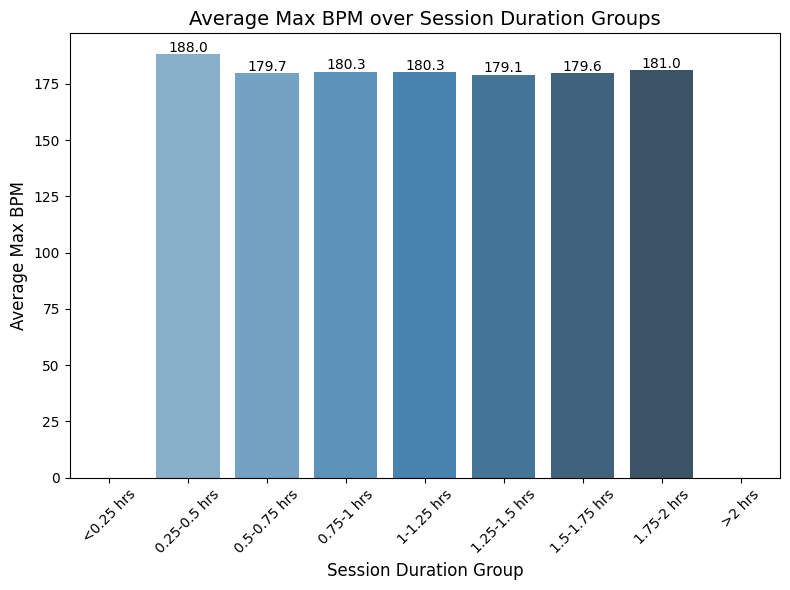

In [ ]:
#Calculating Average Max BPM
max_bpm_avg = session_duration_group_df.groupby('Session_Duration_Group')['Max_BPM'].mean().reset_index()

#Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=max_bpm_avg,
    x='Session_Duration_Group',
    y='Max_BPM',
    palette='Blues_d'
)

#Adding annotations for each bar
for i, row in max_bpm_avg.iterrows():
    plt.text(
        i,
        row['Max_BPM'] + 1,
        f"{row['Max_BPM']:.1f}",
        color='black',
        ha='center',
        fontsize=10
    )

#Adding customizations
plt.title('Average Max BPM over Session Duration Groups', fontsize=14)
plt.xlabel('Session Duration Group', fontsize=12)
plt.ylabel('Average Max BPM', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the above bar plot, we can see that the highest value of **Average Max BPM** (**188.0**) is observed when session duration for workout is between **0.25-0.5 hrs**. For the seesion durations beyond this range, the Average value of Max BPM is not very different and lies in the range of (**179 - 181**).

### **4.2.8 Barplot: Avergae Calories Burned by Obesity Level**

<ipython-input-37-4b0ce0c9a339>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obesity_group_calories = obesity_group_df.groupby('Obesity_Level')['Calories_Burned'].mean().reset_index()
<ipython-input-37-4b0ce0c9a339>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=obesity_group_df, x='Obesity_Level', y='Calories_Burned', palette='coolwarm')


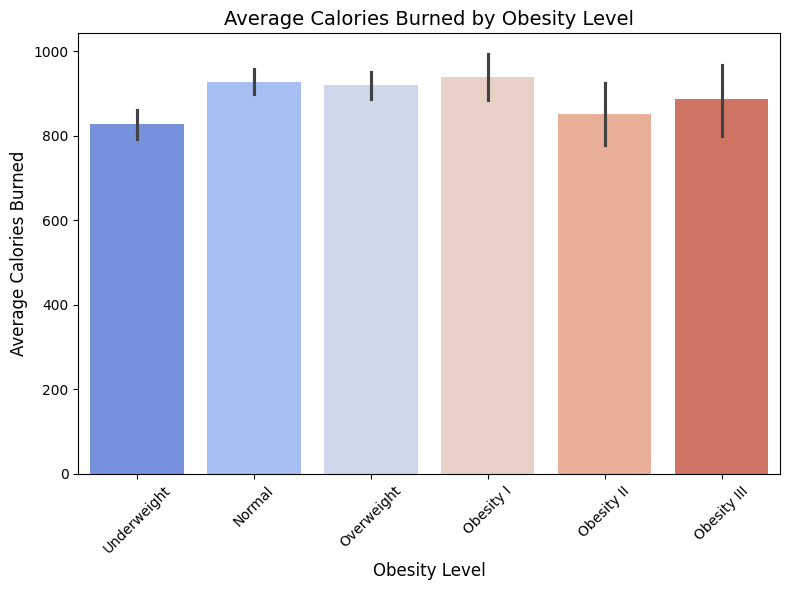

In [ ]:
#Calculating Average calories burned by Obesity Level
obesity_group_calories = obesity_group_df.groupby('Obesity_Level')['Calories_Burned'].mean().reset_index()

#Plotting the Barplot
plt.figure(figsize=(8, 6))
sns.barplot(data=obesity_group_df, x='Obesity_Level', y='Calories_Burned', palette='coolwarm')
plt.title('Average Calories Burned by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Average Calories Burned', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above plot, we can assess how Calories Burned vary across different Obesity Levels. Surprisingly, the maximum value for **Average Calories Burned** was for the proportion of people belonging to the "**Obesity I**" category, followed by "**Normal**" category. The **Average Calories Burned** by people belonging to the "**Overweight**" category was higher than people belonging to the "**Underweight**" category.

### **4.2.9 Scatter Plot: Calories Burned vs Obesity Level**

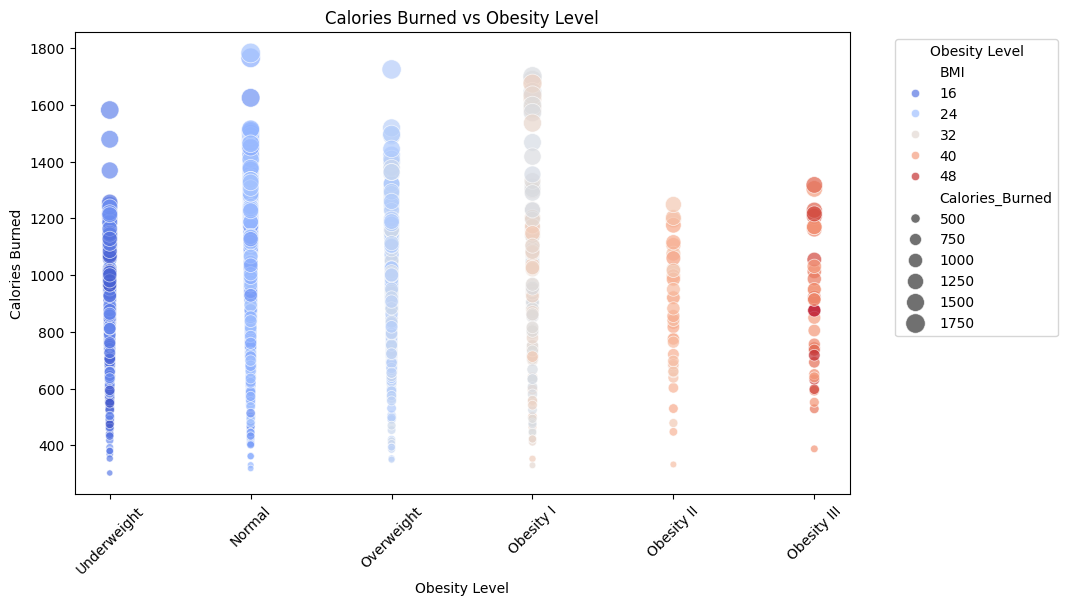

In [ ]:
#Plotting the Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=obesity_group_df, x='Obesity_Level', y='Calories_Burned', hue='BMI', palette='coolwarm', size='Calories_Burned', sizes=(20, 200), alpha=0.7)
plt.title('Calories Burned vs Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the above plot, we can infer that as the **BMI** increases, **Clories Burned** decreases. And hence, the **Obesity Level** also increases. Proportion of people belonging to the "**Obesity III**" category have the least value of Calories Burned. Proportion of people belonging to the "**Normal**" category have the highest value of Calories Burned. People belonging to the "**Underweight**" category lies somewhere in the middle. Surprisingly, from the above plot, we observed that the **Calories Burned** by people belonging to the "**Overweight**" category was **higher** than people belonging to the "**Underweight**" category.

## **4.3 Multi-Variate Analysis**

### **4.3.1 Heatmap: Correlation between Numerical Features**

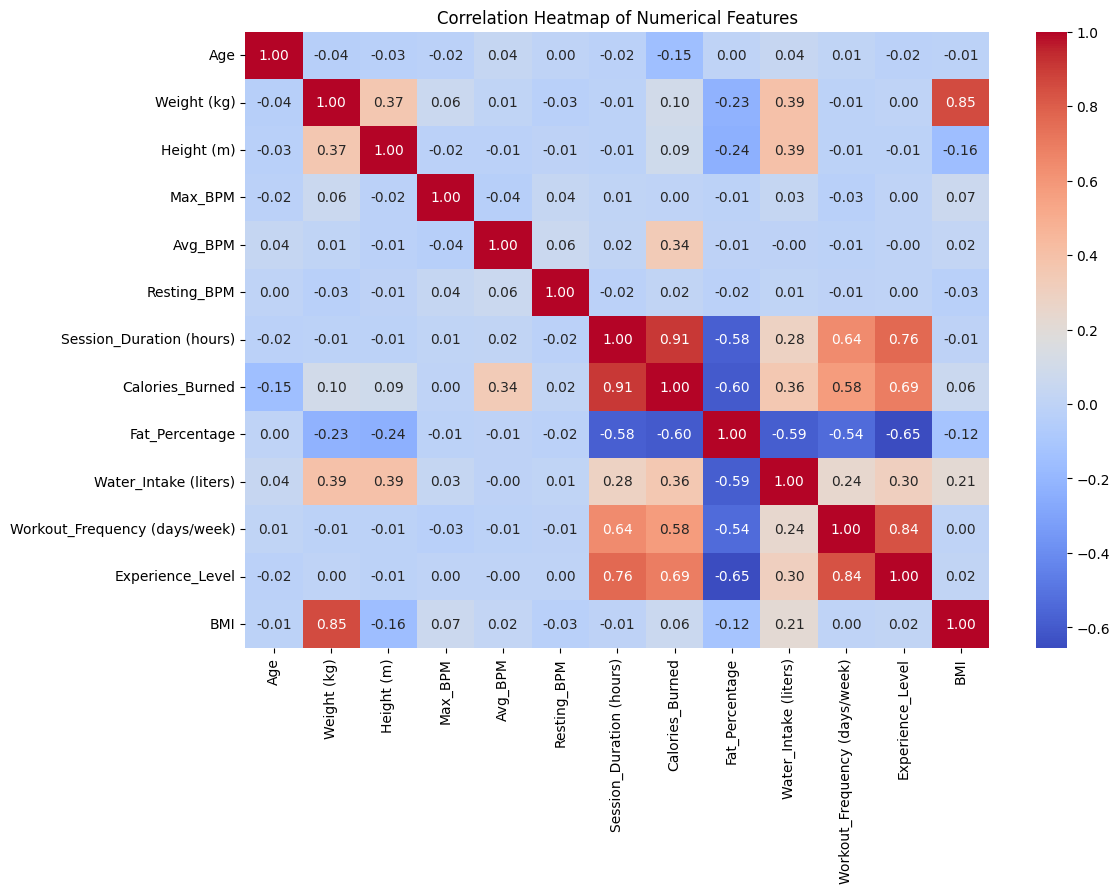

In [ ]:
#Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

#Calculating the correlation matrix
corr = numeric_df.corr()

#Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


From the above heatmap, we can clearly see that the features, "**Weight (Kg)**" and "**BMI**", are strongly related to each other with a correlation value of **0.85**. There is also a decent positive correlation between the features, "**Session_Duration (hours)**" and "**Experience_Level**" with a correlation value of **0.76**.

### **4.3.2 Pairplot: Relationships between Workout_Type and Other Features**

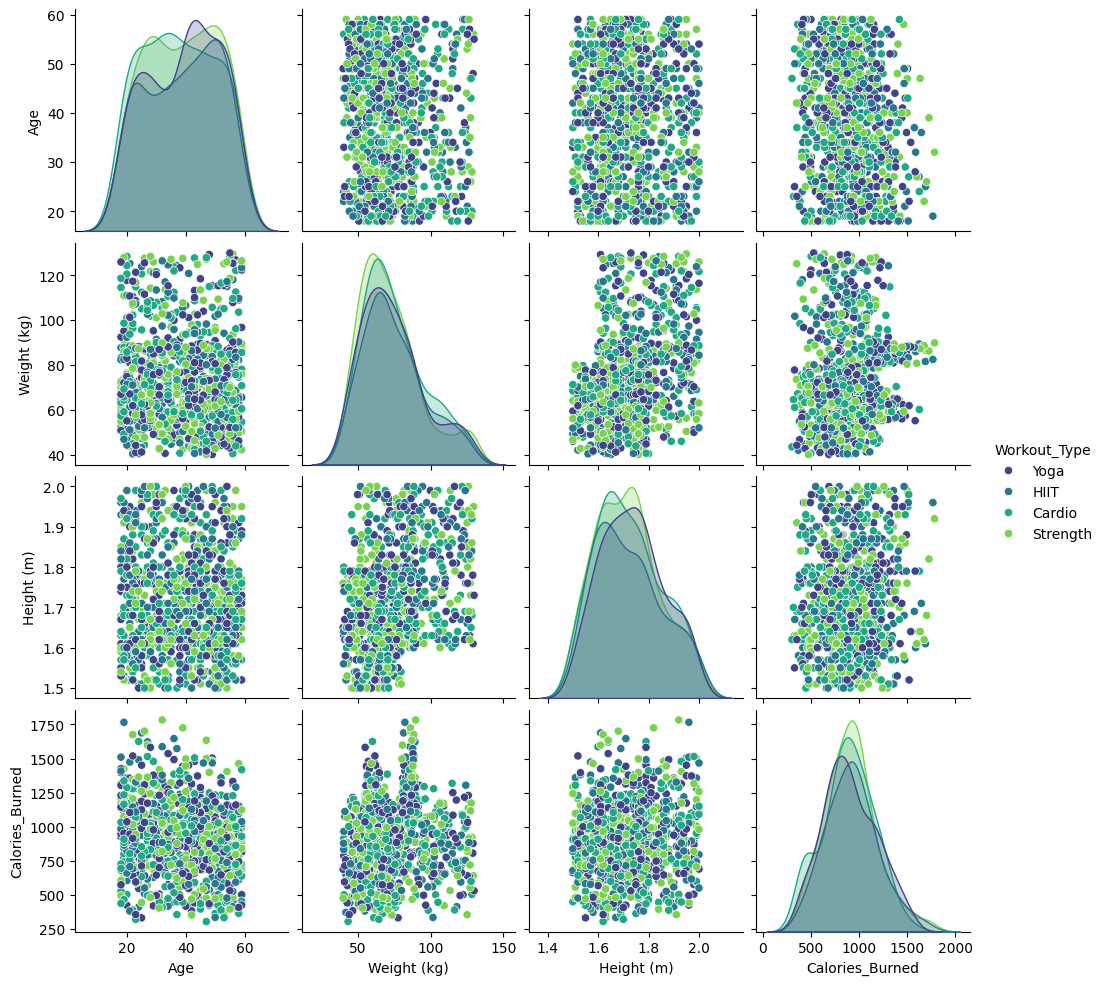

In [ ]:
#Selecting some numerical features from our dataset
selected_features = ['Age', 'Weight (kg)', 'Height (m)', 'Calories_Burned', 'Workout_Type']
#Plotting the pairplot
sns.pairplot(df[selected_features], hue='Workout_Type', palette='viridis')
plt.show()

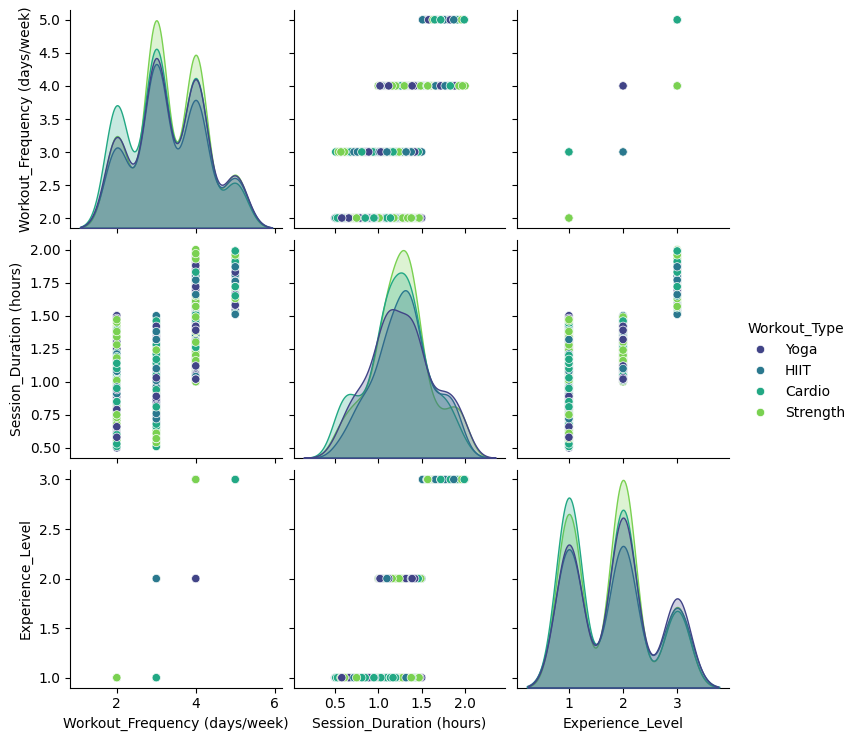

In [ ]:
#Selecting some numerical features from our dataset
selected_features = ['Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Experience_Level', 'Workout_Type']
#Plotting the pairplot
sns.pairplot(df[selected_features], hue='Workout_Type', palette='viridis')
plt.show()

### **4.3.3 Pairplot: Relationships between Age_Group and Other Features**

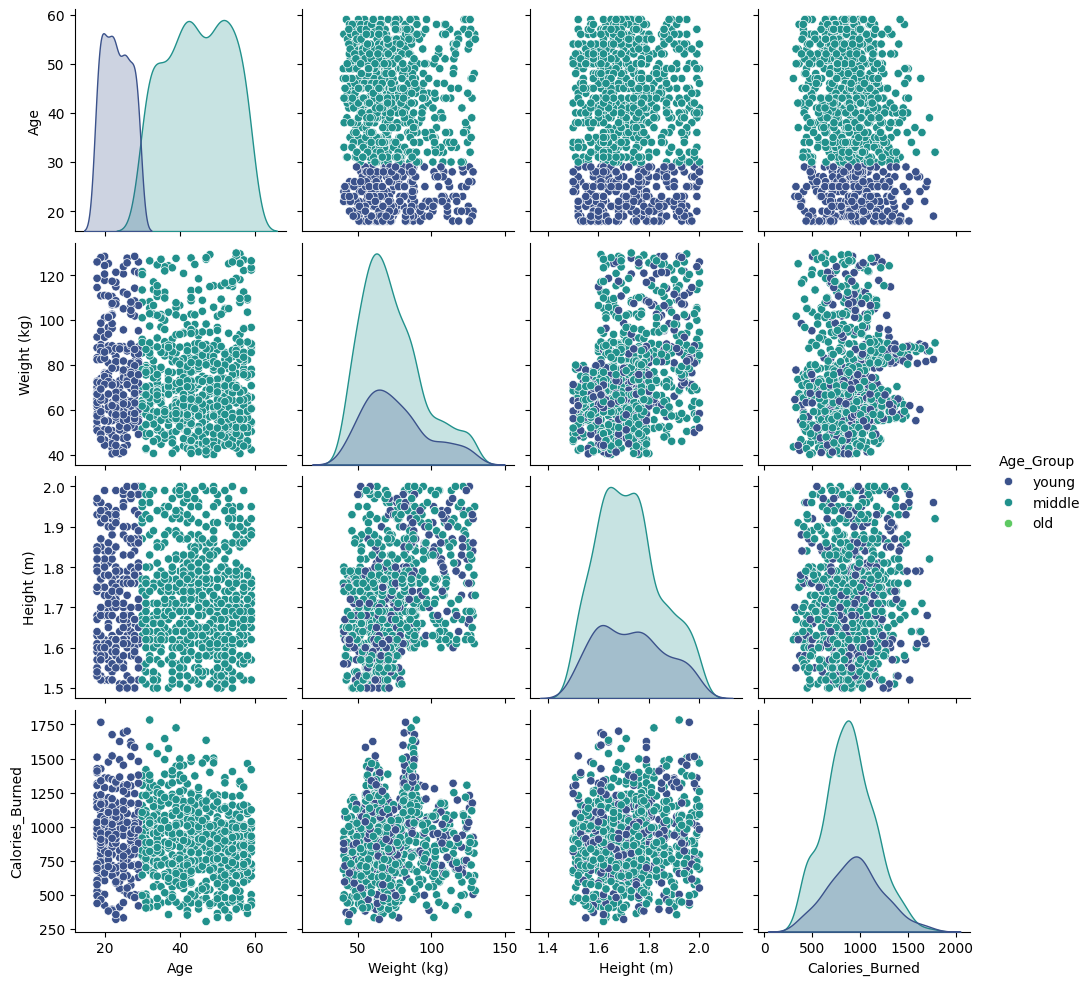

In [ ]:
#Selecting some numerical features from our dataset
selected_features = ['Age', 'Weight (kg)', 'Height (m)', 'Calories_Burned', 'Age_Group']
#Plotting the pairplot
sns.pairplot(age_group_df[selected_features], hue='Age_Group', palette='viridis')
plt.show()

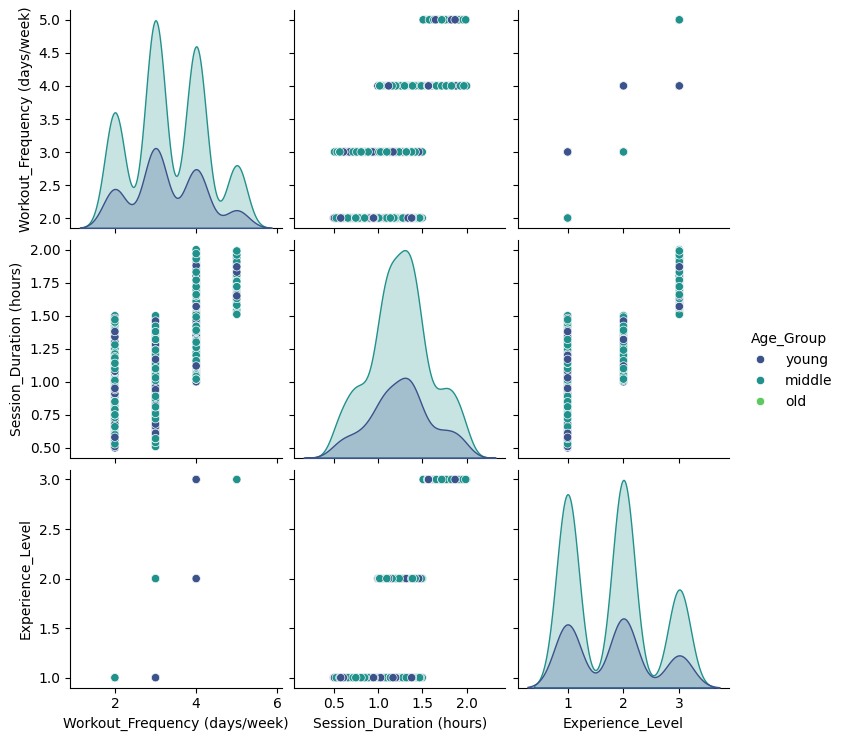

In [ ]:
#Selecting some numerical features from our dataset
selected_features = ['Workout_Frequency (days/week)', 'Session_Duration (hours)', 'Experience_Level', 'Age_Group']
#Plotting the pairplot
sns.pairplot(age_group_df[selected_features], hue='Age_Group', palette='viridis')
plt.show()

### **4.3.4 Scatterplot: Calories Burned vs. Session Duration by Workout Frequency**

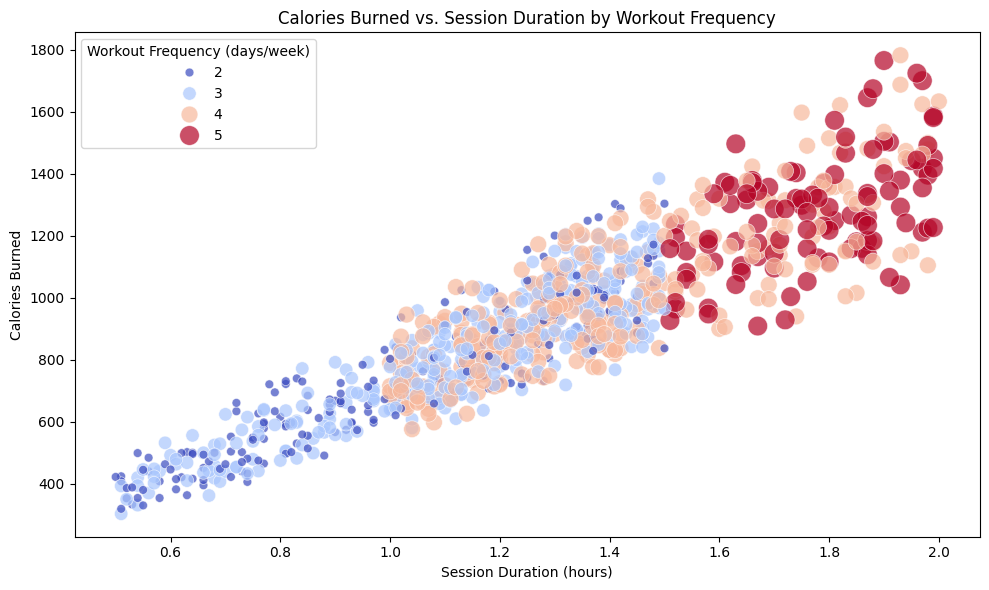

In [ ]:
#Plotting Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Session_Duration (hours)',
    y='Calories_Burned',
    hue='Workout_Frequency (days/week)',
    palette='coolwarm',
    size='Workout_Frequency (days/week)',
    sizes=(40, 200),
    alpha=0.7
)
plt.title('Calories Burned vs. Session Duration by Workout Frequency')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.legend(title='Workout Frequency (days/week)', loc='upper left')
plt.tight_layout()
plt.show()

From the above scatter plot we can infer that as the Session Duration increases, the workout Frequency increases and the amount of Clories Burned also increases. So, we can conclude that there is a **Continuously Increasing** relationship between **Session Duration**, **Calories Burned**, and **Workout Frequency**.

### **4.3.5 Scatterplot: Water Intake vs. Fat Percentage by Gender**

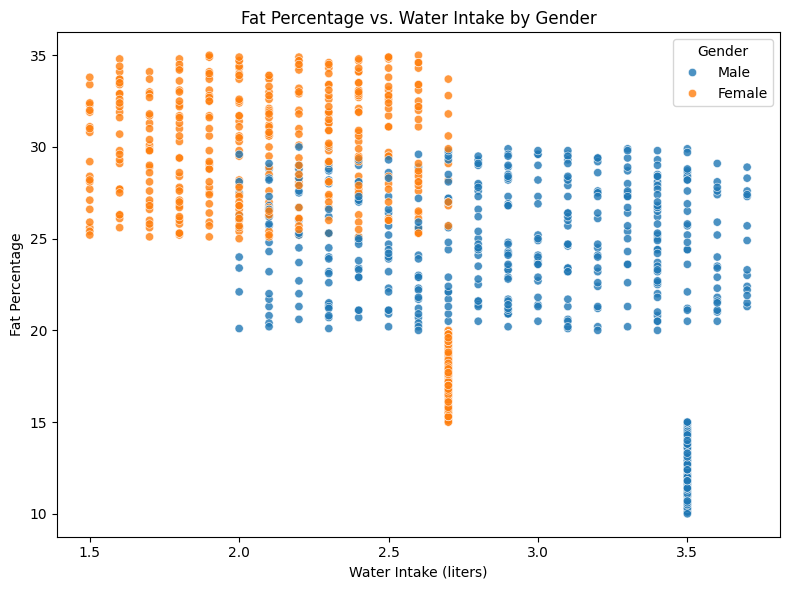

In [ ]:
#Plotting Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Water_Intake (liters)',
    y='Fat_Percentage',
    hue='Gender',
    palette='tab10',
    alpha=0.8
)
plt.title('Fat Percentage vs. Water Intake by Gender')
plt.xlabel('Water Intake (liters)')
plt.ylabel('Fat Percentage')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

From the above plot, we can understand hydration habits (Water_Intake) and their correlation with body fat percentage across different genders (Male and Feamle). We can observe a trend here. **Male** Population has more **Water Intake** than **Female** population. Also, We can observe that as the **Water Intake increases**, the **Fat Percentage decreases**. This means that Water Intake and Fat Percentage are **inversely proportional**.


### **4.3.6 Stacked Barplot: Average Resting BPM by Gender and Workout Type**

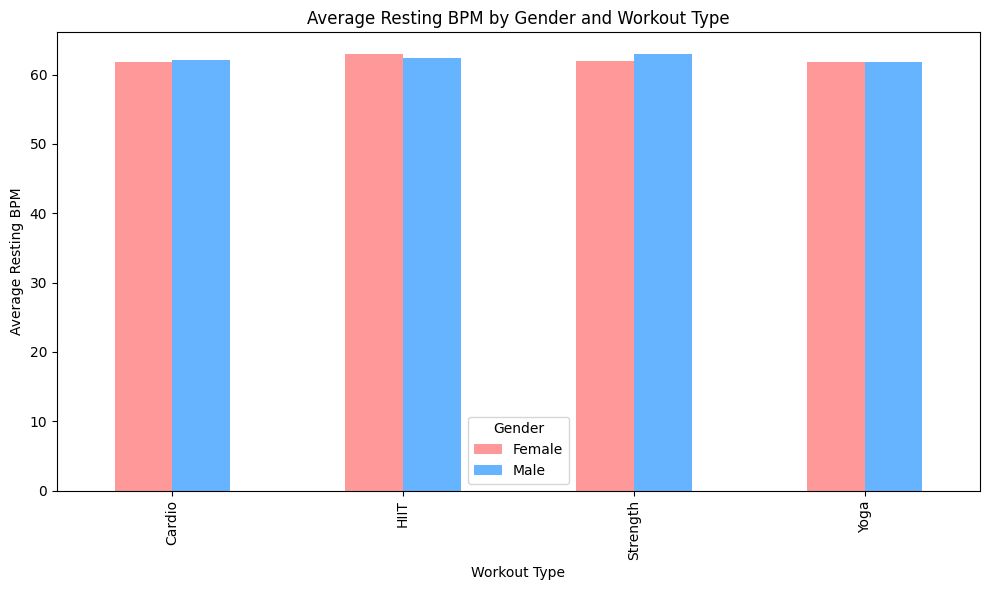

In [ ]:
#Calculating Average Resting BPM
resting_bpm = df.groupby(['Workout_Type', 'Gender'])['Resting_BPM'].mean().unstack()

#Plotting Stacked Bar Plot
resting_bpm.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#FF9999', '#66B3FF'])
plt.title('Average Resting BPM by Gender and Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Resting BPM')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

From the above plot, we can see that the value of **Average Resting BPM** is exactly same for both **Male** and **Female** when their Workout Type is "**Yoga**". For other workout types also, the Average Resting BPM is almost the same for both Male and Female population.

### **4.3.7 Barplot: Calories Burned by Obesity Level and Workout Type**

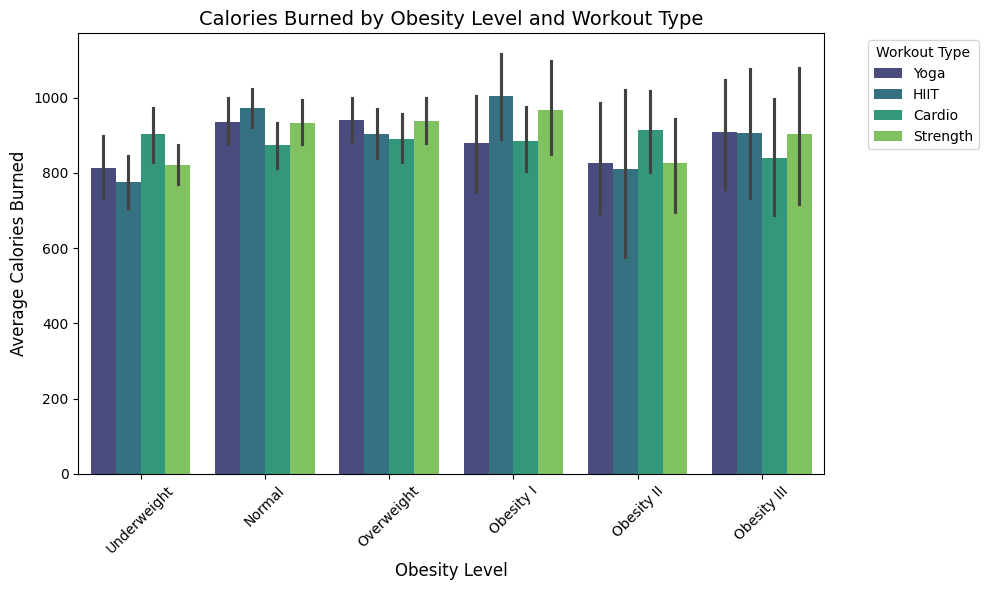

In [ ]:
#Plotting Barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=obesity_group_df,
    x='Obesity_Level',
    y='Calories_Burned',
    hue='Workout_Type',
    palette='viridis'
)
plt.title('Calories Burned by Obesity Level and Workout Type', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Average Calories Burned', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the above plot, we can compare how **Calories Burned** differ across different **Obesity Levels** and **Workout Types**. We can observe that for the people belonging to the "**Underweight**" category and "**Obesity II** category", "**Cardio**" works the most in burning maximum **Calories**. For people belonging to the "**Normal**" category and "**Obesity I**" category, "**HIIT**" works the best. For people belonging to the "**Overweight**" category, "**Strength**" Workout Type works the best, although "**Yoga**" also gave comparable results. In case of "**Obesity III**" category, "**Yoga**" gave best results. "**HIIT**" and "**Strenght**" Workouts also gave comparable results.

 # **5. Data Preprocessing**

## **5.1 Feature Engineering**

In [ ]:
labels_age = ['young','middle','old']
bins = [0,30,60,100]
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels_age, right=False)

labels_level = ['Underweight','Normal','Overweight','Obesity I','Obesity II','Obesity III']
bins = [0,18.5,25,30,35,40,100]
df['Obesity_Level'] = pd.cut(df['BMI'], bins=bins, labels=labels_level, right=False)
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  middle    Male         88.3        1.71      180      157           60   
1  middle  Female         74.9        1.53      179      151           66   
2  middle  Female         68.1        1.66      167      122           54   
3   young    Male         53.2        1.70      190      164           56   
4  middle    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI Obesity_Level  
0  30.20     Obesity I  
1  32.00     Obesity I  
2  24.71        Normal  
3  18.41   Underweight  
4  14.39   Underweight

## **5.2 Handling Categorical Data (Using One-Hot Encoding)**

In [ ]:
categories = ['Age','Gender', 'Workout_Type','Obesity_Level']
encoder = OneHotEncoder(drop = 'first', sparse_output=False)
encoded_data = encoder.fit_transform(df[categories])
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(categories))
df_fix = df.drop(categories, axis=1)
df_fix = pd.concat([df_fix, encoded_df], axis=1)
df_fix.head()

Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0         88.3        1.71      180      157           60   
1         74.9        1.53      179      151           66   
2         68.1        1.66      167      122           54   
3         53.2        1.70      190      164           56   
4         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  ...  Age_young  \
0                    3.5                              4  ...        0.0   
1                    2.1                              4  ...        0.0   
2                    2.3                              4  ...        0.0   
3                    2.1                              3  ...        1.0   
4                    2.8                              3  ...        0.0   

   Gender_Male  Workout_Type_HIIT  Workout_Type_Strength  Workout_Type_Yoga  \
0          1.0                0.0                    0.0                1.0   
1          0.0                1.0                    0.0                0.0   
2          0.0                0.0                    0.0                0.0   
3          1.0                0.0                    1.0                0.0   
4          1.0                0.0                    1.0                0.0   

   Obesity_Level_Obesity I  Obesity_Level_Obesity II  \
0                      1.0                       0.0   
1                      1.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   Obesity_Level_Obesity III  Obesity_Level_Overweight  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   Obesity_Level_Underweight  
0                        0.0  
1                        0.0  
2                        0.0  
3                        1.0  
4                        1.0  

[5 rows x 22 columns]

## **5.3 Generating Synthetic Data**

In [ ]:
# Normalize data
normalized = MinMaxScaler(feature_range=(-1, 1))
normalized_data = normalized.fit_transform(df_fix)

# Convert to tensor
batch_size = 32
data_tensor = torch.tensor(normalized_data, dtype=torch.float32)
data_loader = DataLoader(TensorDataset(data_tensor), batch_size, shuffle=True)
data_tensor

tensor([[ 0.0745, -0.1600,  0.0256,  ..., -1.0000, -1.0000, -1.0000],
        [-0.2236, -0.8800, -0.0256,  ..., -1.0000, -1.0000, -1.0000],
        [-0.3749, -0.3600, -0.6410,  ..., -1.0000, -1.0000, -1.0000],
        ...,
        [-0.5462,  0.0400,  0.7436,  ..., -1.0000, -1.0000, -1.0000],
        [ 0.9221,  0.3200,  0.9487,  ..., -1.0000, -1.0000, -1.0000],
        [ 0.0834, -0.4800, -0.6923,  ..., -1.0000, -1.0000, -1.0000]])

In [ ]:
def seed_all(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

seed_all(0)

In [ ]:
# GAN Model
class Generator(nn.Module):
    def __init__(self, latent_dim, data_features):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 64),nn.ReLU(),nn.Dropout(0.3),
            nn.Linear(64, 128),nn.ReLU(),nn.Dropout(0.3),
            nn.Linear(128, data_features),nn.Tanh())

    def forward(self, x):
        return self.model(x)


class Discriminator(nn.Module):
    def __init__(self, data_features):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(data_features, 128),nn.LeakyReLU(0.2),nn.Dropout(0.3),
            nn.Linear(128, 64),nn.LeakyReLU(0.2),nn.Dropout(0.3),
            nn.Linear(64, 1),nn.Sigmoid())

    def forward(self, x):
        return self.model(x)

In [ ]:
# Hyperparameters
latent_dim = 10
data_features = data_tensor.shape[1]
lr = 0.0002
epochs = 2000

# Initialize models
generator = Generator(latent_dim, data_features)
discriminator = Discriminator(data_features)

# Loss function
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

In [ ]:
# Training loop
for epoch in range(epochs):
    for real_data, in data_loader:
        batch_size = real_data.size(0)

        # Train Discriminator
        optimizer_D.zero_grad()
        # Real data
        real_labels = torch.ones(batch_size, 1)
        real_output = discriminator(real_data)
        loss_real = criterion(real_output, real_labels)
        # Fake data
        noise = torch.randn(batch_size, latent_dim)
        fake_data = generator(noise)
        fake_labels = torch.zeros(batch_size, 1)
        fake_output = discriminator(fake_data.detach())
        loss_fake = criterion(fake_output, fake_labels)
        # Total loss
        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        noise = torch.randn(batch_size, latent_dim)
        fake_data = generator(noise)
        fake_output = discriminator(fake_data)
        loss_G = criterion(fake_output, real_labels)
        loss_G.backward()
        optimizer_G.step()

    # Print progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}] - Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")

# Generate synthetic data
noise = torch.randn(1000, latent_dim)
synthetic_data = generator(noise).detach().numpy()

# Inverse scale the synthetic data to original range
synthetic_data_original = normalized.inverse_transform(synthetic_data)

synthetic_df = pd.DataFrame(synthetic_data_original, columns=list(df_fix))
synthetic_df

Epoch [100/2000] - Loss D: 0.7982, Loss G: 2.2438
Epoch [200/2000] - Loss D: 0.3960, Loss G: 2.2691
Epoch [300/2000] - Loss D: 0.4056, Loss G: 1.9432
Epoch [400/2000] - Loss D: 1.2839, Loss G: 1.1634
Epoch [500/2000] - Loss D: 0.8288, Loss G: 1.3122
Epoch [600/2000] - Loss D: 0.9537, Loss G: 1.0906
Epoch [700/2000] - Loss D: 1.0935, Loss G: 1.0566
Epoch [800/2000] - Loss D: 0.8045, Loss G: 1.2207
Epoch [900/2000] - Loss D: 1.1208, Loss G: 1.2972
Epoch [1000/2000] - Loss D: 1.0136, Loss G: 0.9814
Epoch [1100/2000] - Loss D: 0.9388, Loss G: 1.0626
Epoch [1200/2000] - Loss D: 1.0812, Loss G: 0.9642
Epoch [1300/2000] - Loss D: 0.7678, Loss G: 1.0150
Epoch [1400/2000] - Loss D: 1.2832, Loss G: 1.0615
Epoch [1500/2000] - Loss D: 1.1954, Loss G: 1.1368
Epoch [1600/2000] - Loss D: 1.2420, Loss G: 1.1407
Epoch [1700/2000] - Loss D: 0.8898, Loss G: 0.9713
Epoch [1800/2000] - Loss D: 0.7255, Loss G: 1.3882
Epoch [1900/2000] - Loss D: 1.1543, Loss G: 1.0744
Epoch [2000/2000] - Loss D: 1.0621, Loss

Weight (kg)  Height (m)     Max_BPM     Avg_BPM  Resting_BPM  \
0      78.336525    1.884031  166.822601  121.794670    51.305225   
1      66.214661    1.594214  169.475266  131.316818    59.919205   
2      63.868362    1.532082  162.424637  139.810226    58.148293   
3      56.049240    1.785452  164.325745  141.385498    69.637337   
4      52.158558    1.520129  164.782104  129.938126    51.290802   
..           ...         ...         ...         ...          ...   
995    91.369759    1.898639  192.046356  121.706848    57.355698   
996    47.484085    1.531423  182.879150  120.416283    64.392715   
997    50.837700    1.509564  163.327057  125.513664    64.807190   
998    63.439610    1.509920  160.846466  122.654503    51.371098   
999    50.356133    1.577356  164.461884  148.616608    56.849030   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                    1.772898      1204.578857       13.997690   
1                    1.403667       935.415771       29.489872   
2                    1.533641      1085.242065       28.880688   
3                    1.414043      1047.992798       25.516954   
4                    1.856037      1391.119263       32.690964   
..                        ...              ...             ...   
995                  1.376515       932.717590       25.911690   
996                  1.401035       853.341736       29.836803   
997                  1.689851      1118.750610       30.108223   
998                  1.740780      1093.215332       30.686972   
999                  1.538307      1152.103516       29.055092   

     Water_Intake (liters)  Workout_Frequency (days/week)  ...  Age_young  \
0                 3.386044                       4.630058  ...   0.000000   
1                 1.978466                       3.542958  ...   0.000054   
2                 1.992476                       3.051960  ...   0.000358   
3                 2.484819                       3.806237  ...   0.000000   
4                 1.747364                       2.317873  ...   1.000000   
..                     ...                            ...  ...        ...   
995               3.147084                       3.240669  ...   0.000000   
996               2.424912                       2.107412  ...   0.000000   
997               1.845109                       3.651286  ...   0.000000   
998               1.863797                       3.087971  ...   0.000000   
999               1.885957                       2.510346  ...   1.000000   

      Gender_Male  Workout_Type_HIIT  Workout_Type_Strength  \
0    1.000000e+00       9.905406e-01               0.000000   
1    8.940697e-08       2.086163e-07               0.000016   
2    0.000000e+00       2.980232e-08               0.088605   
3    9.999999e-01       0.000000e+00               0.000000   
4    0.000000e+00       0.000000e+00               1.000000   
..            ...                ...                    ...   
995  1.000000e+00       1.000000e+00               0.000000   
996  1.758337e-06       1.000000e+00               0.000000   
997  5.960464e-08       0.000000e+00               0.000000   
998  0.000000e+00       0.000000e+00               0.999998   
999  0.000000e+00       0.000000e+00               0.060234   

     Workout_Type_Yoga  Obesity_Level_Obesity I  Obesity_Level_Obesity II  \
0         0.000000e+00             7.629395e-06              9.862661e-03   
1         6.556511e-04             1.475543e-01              2.086163e-06   
2         0.000000e+00             1.114309e-03              0.000000e+00   
3         9.999967e-01             0.000000e+00              3.376603e-04   
4         0.000000e+00             0.000000e+00              0.000000e+00   
..                 ...                      ...                       ...   
995       5.960464e-08             1.096726e-01              1.529905e-02   
996       0.000000e+00             2.980232e-08              5.960464e-08   
997     

## **5.4 Checking if Syntheic Data is Similar to the Original (Raw) Data**

### **5.4.1 Comparing Using Histograms**

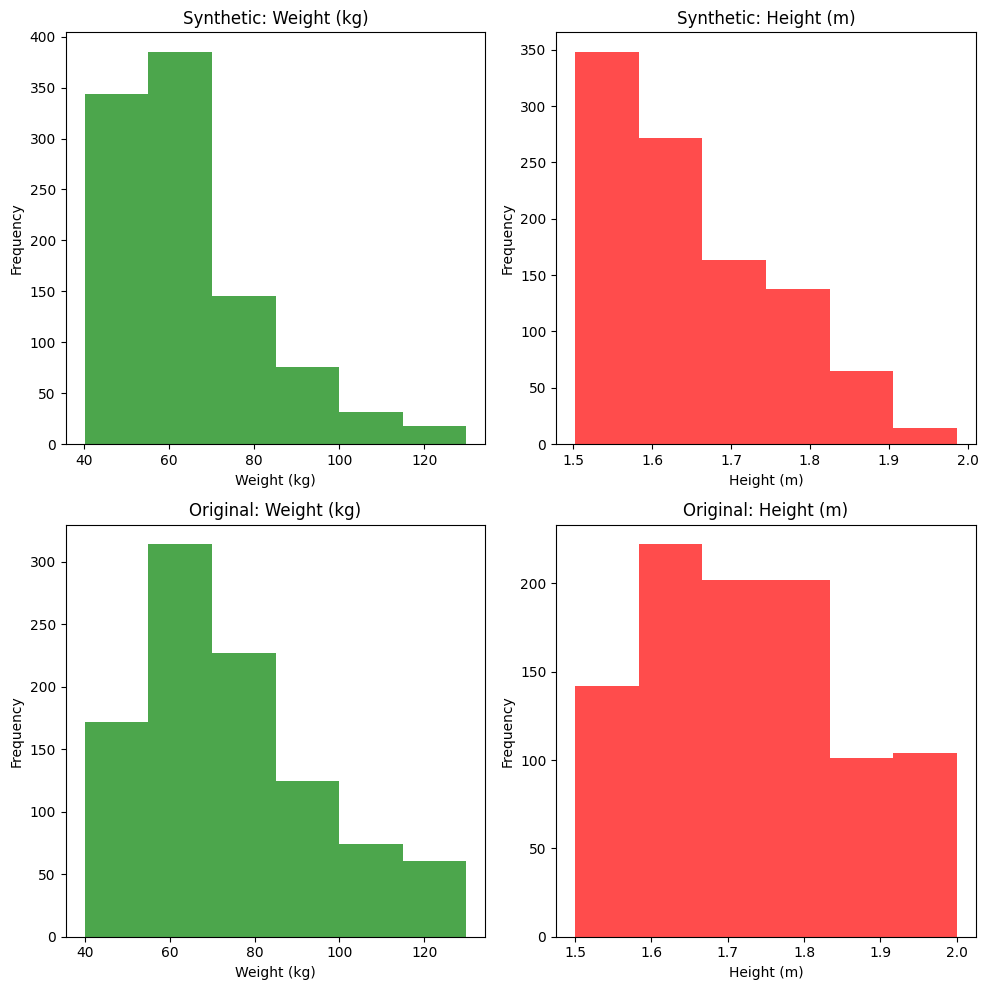

In [ ]:
#Creating a subplot grid with 2 rows and 4 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Weight (kg)', 'Height (m)']
colors = ['green', 'red']

#Plotting histograms for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame histogram
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].hist(synthetic_df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Frequency")

    #Original DataFrame histogram
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].hist(df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Frequency")

#Adjust layout
plt.tight_layout()
plt.show()

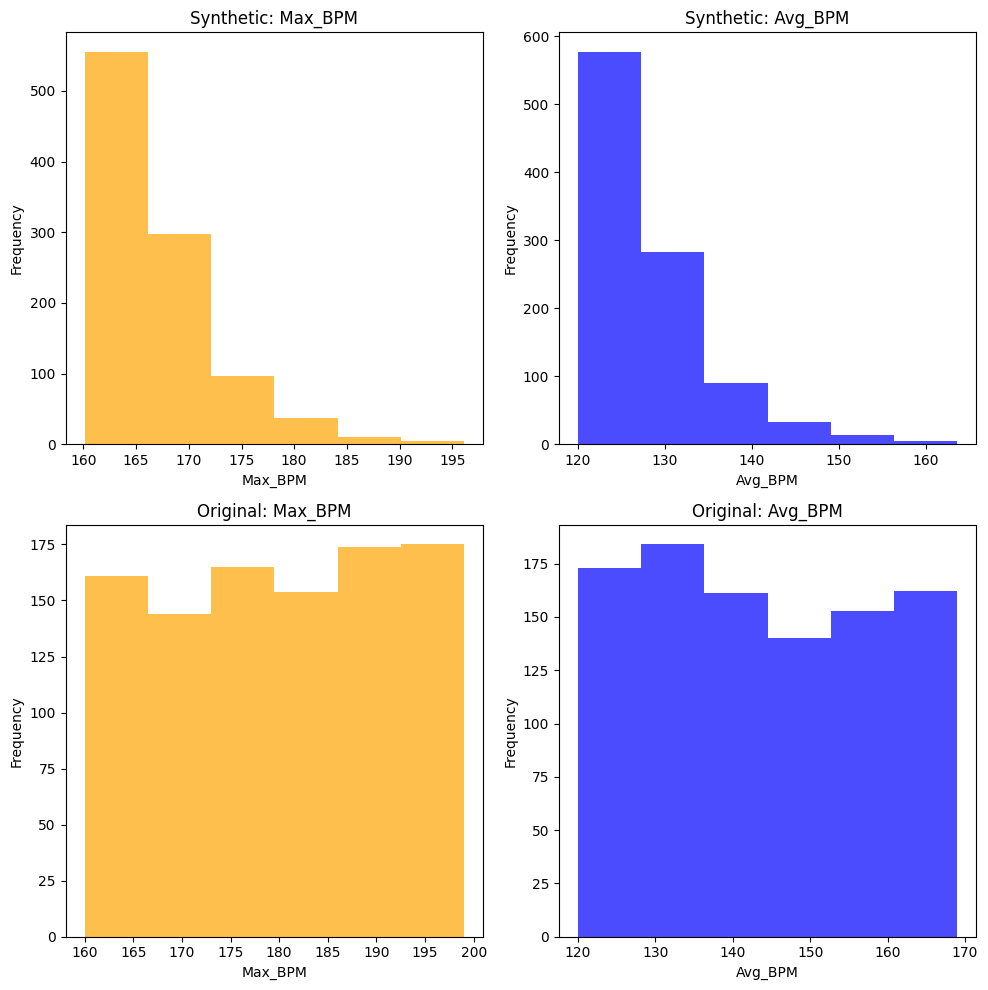

In [ ]:
#Creating a subplot grid with 2 rows and 4 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Max_BPM', 'Avg_BPM']
colors = ['orange', 'blue']

#Plotting histograms for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame histogram
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].hist(synthetic_df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Frequency")

    #Original DataFrame histogram
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].hist(df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Frequency")

#Adjust layout
plt.tight_layout()
plt.show()

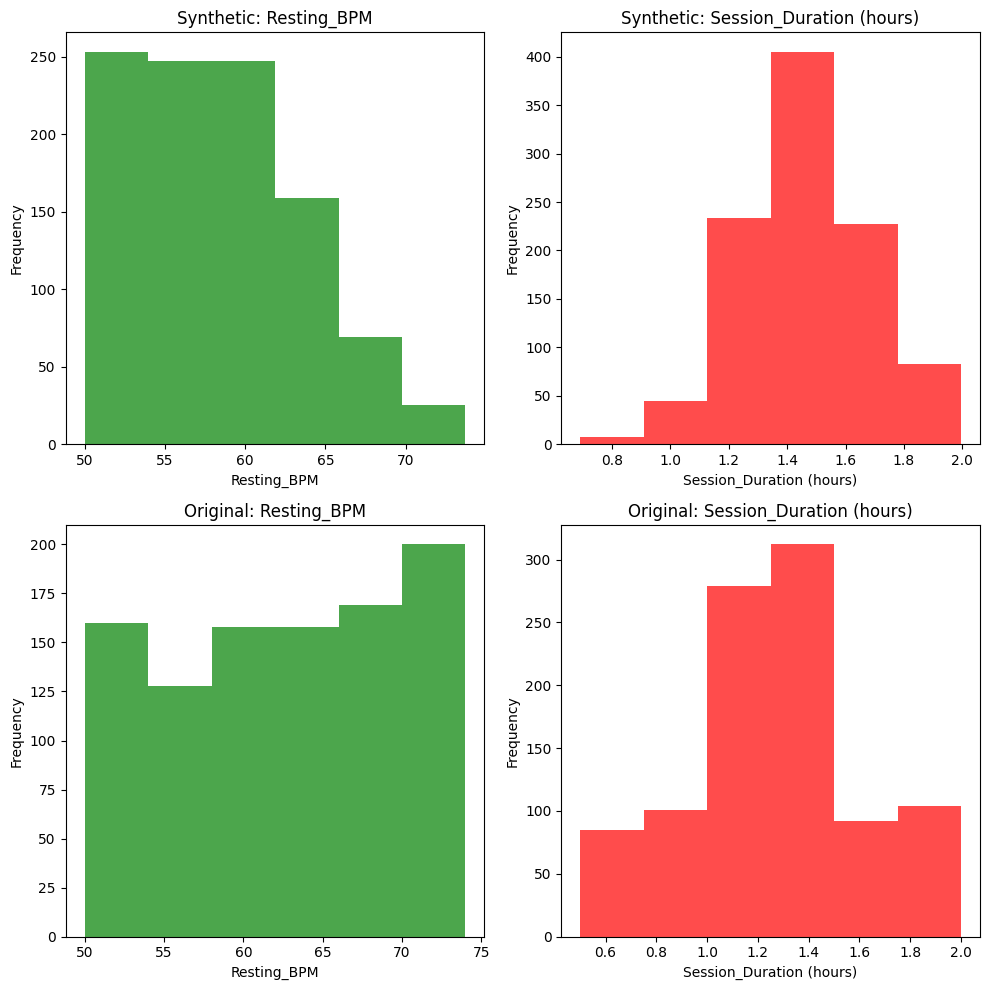

In [ ]:
#Creating a subplot grid with 2 rows and 4 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Resting_BPM', 'Session_Duration (hours)']
colors = ['green', 'red']

#Plotting histograms for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame histogram
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].hist(synthetic_df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Frequency")

    #Original DataFrame histogram
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].hist(df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Frequency")

#Adjust layout
plt.tight_layout()
plt.show()

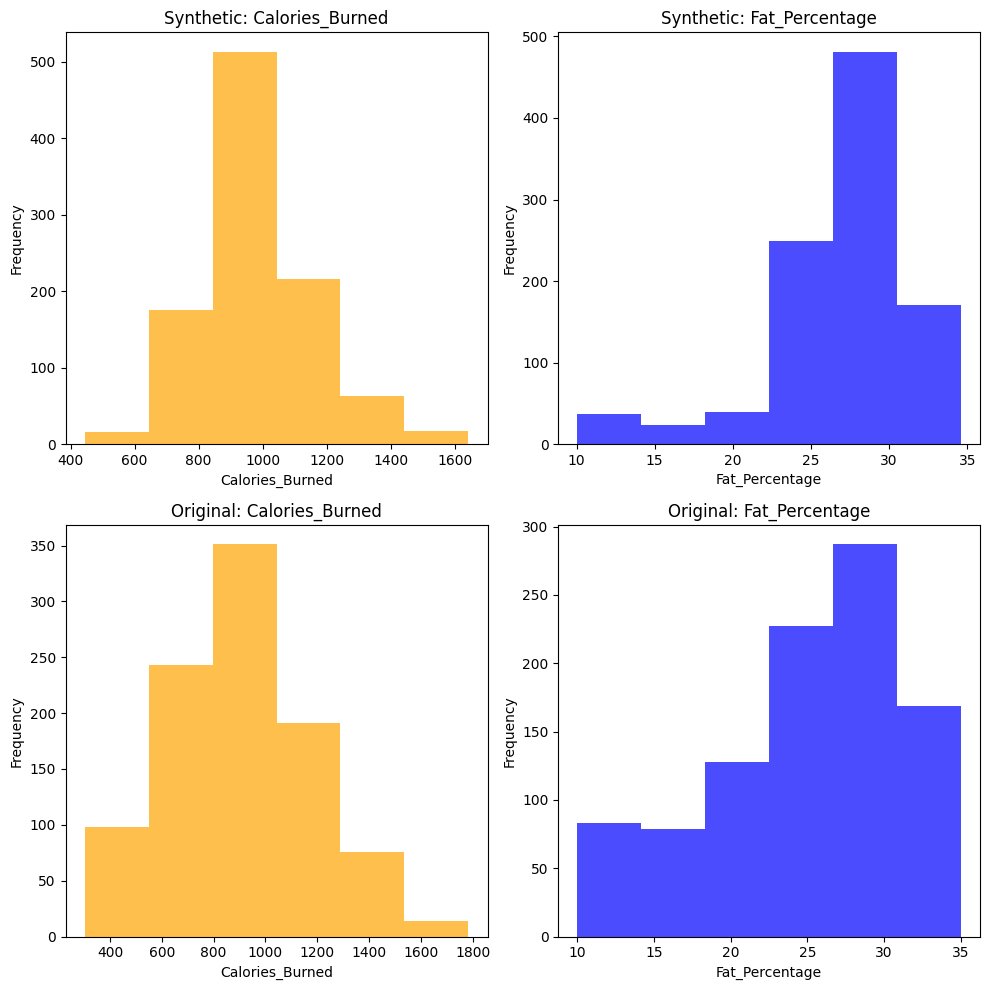

In [ ]:
#Creating a subplot grid with 2 rows and 4 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Calories_Burned', 'Fat_Percentage']
colors = ['orange', 'blue']

#Plotting histograms for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame histogram
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].hist(synthetic_df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Frequency")

    #Original DataFrame histogram
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].hist(df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Frequency")

#Adjust layout
plt.tight_layout()
plt.show()

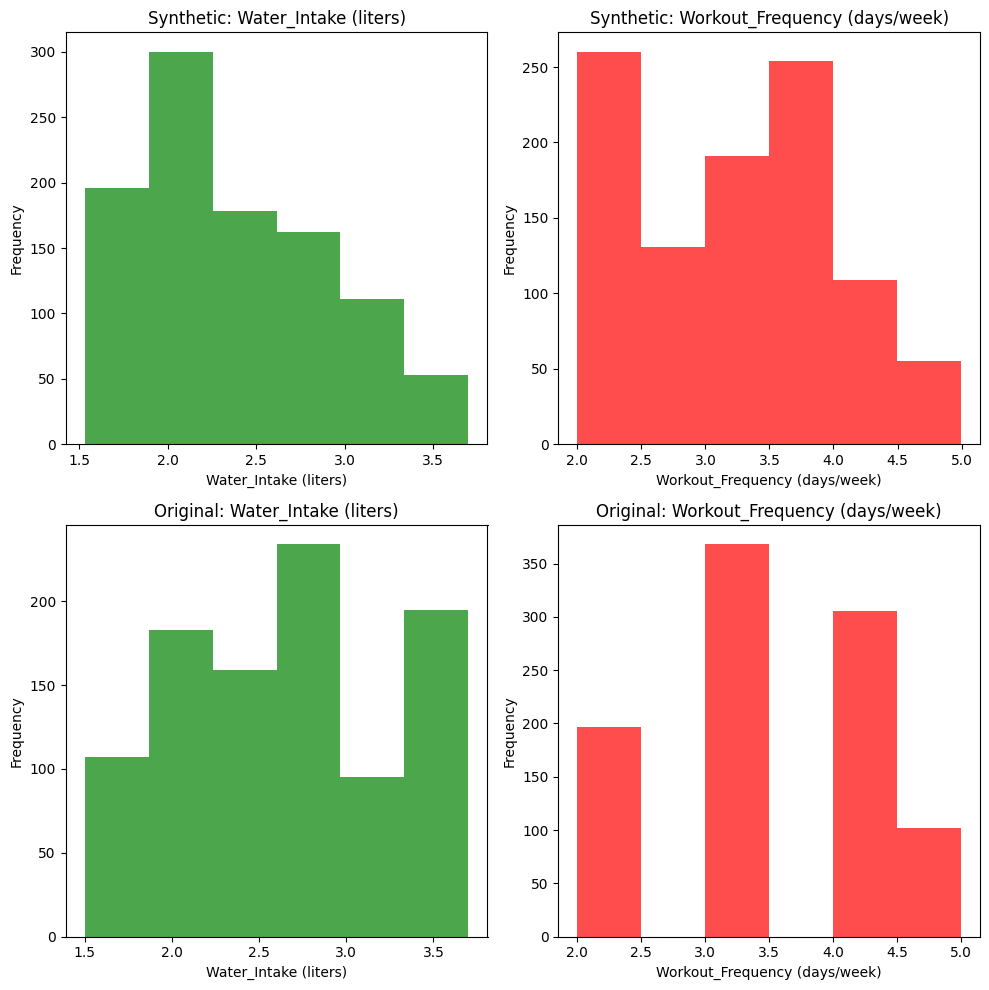

In [ ]:
#Creating a subplot grid with 2 rows and 4 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Water_Intake (liters)',	'Workout_Frequency (days/week)']
colors = ['green', 'red']

#Plotting histograms for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame histogram
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].hist(synthetic_df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Frequency")

    #Original DataFrame histogram
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].hist(df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Frequency")

#Adjust layout
plt.tight_layout()
plt.show()

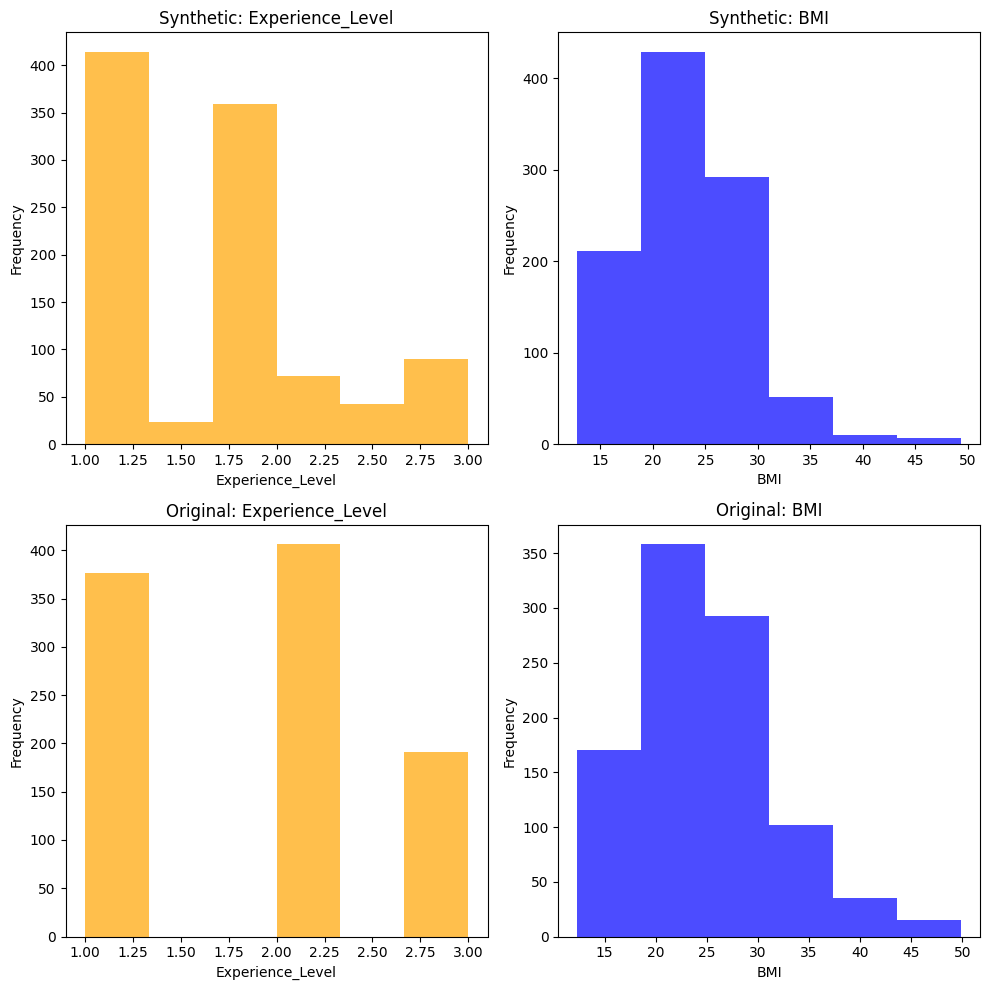

In [ ]:
#Creating a subplot grid with 2 rows and 4 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Experience_Level',	'BMI']
colors = ['orange', 'blue']

#Plotting histograms for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame histogram
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].hist(synthetic_df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Frequency")

    #Original DataFrame histogram
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].hist(df[feature], bins=6, color=colors[idx], alpha=0.7)
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Frequency")

#Adjust layout
plt.tight_layout()
plt.show()

### **5.4.2 Comparing Using Distribution Plots**

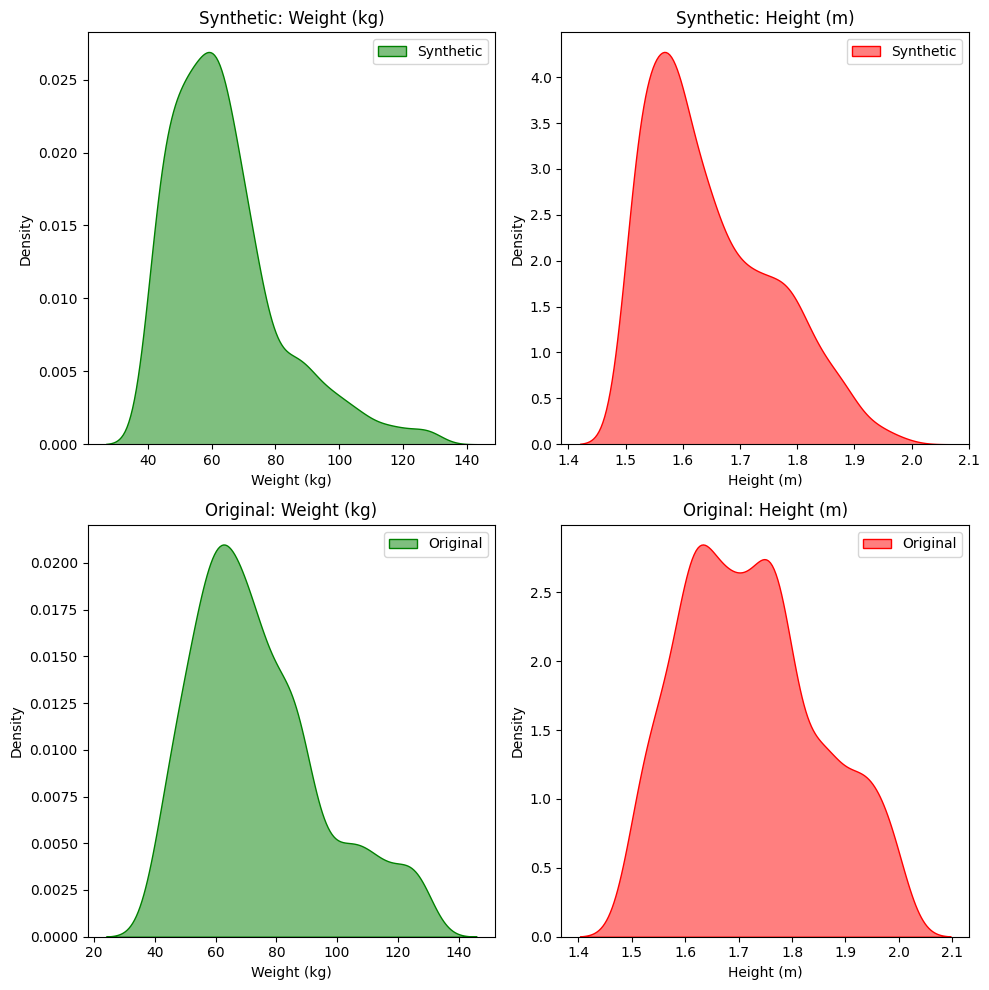

In [ ]:
#Creating a subplot grid with 2 rows and 2 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Weight (kg)', 'Height (m)']
colors = ['green', 'red']

#Plotting KDE plots for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame distribution plot
    sns.kdeplot(
        synthetic_df[feature],
        ax=axes[0, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Synthetic"
    )
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Density")
    axes[0, idx].legend()

    #Original DataFrame distribution plot
    sns.kdeplot(
        df[feature],
        ax=axes[1, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Original"
    )
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Density")
    axes[1, idx].legend()

#Adjust layout
plt.tight_layout()
plt.show()

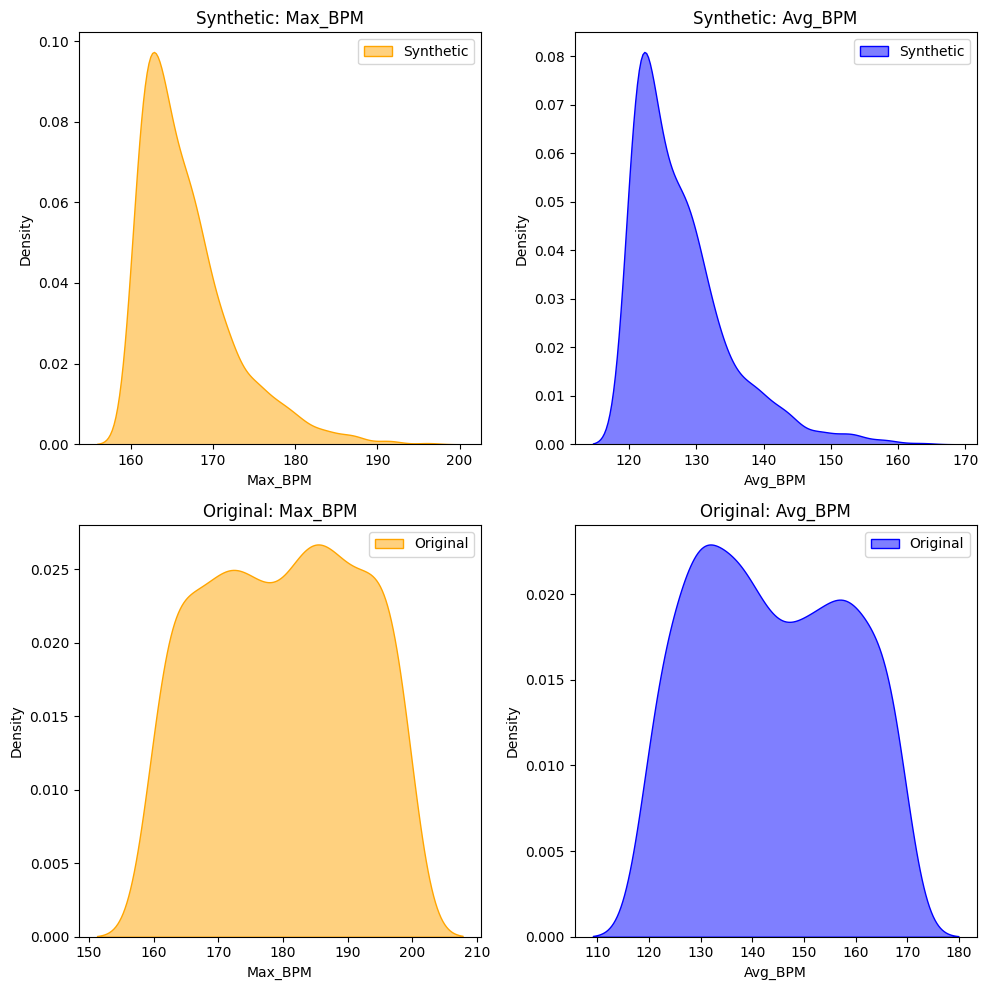

In [ ]:
#Creating a subplot grid with 2 rows and 2 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Max_BPM', 'Avg_BPM']
colors = ['orange', 'blue']

#Plotting KDE plots for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame distribution plot
    sns.kdeplot(
        synthetic_df[feature],
        ax=axes[0, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Synthetic"
    )
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Density")
    axes[0, idx].legend()

    #Original DataFrame distribution plot
    sns.kdeplot(
        df[feature],
        ax=axes[1, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Original"
    )
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Density")
    axes[1, idx].legend()

#Adjust layout
plt.tight_layout()
plt.show()

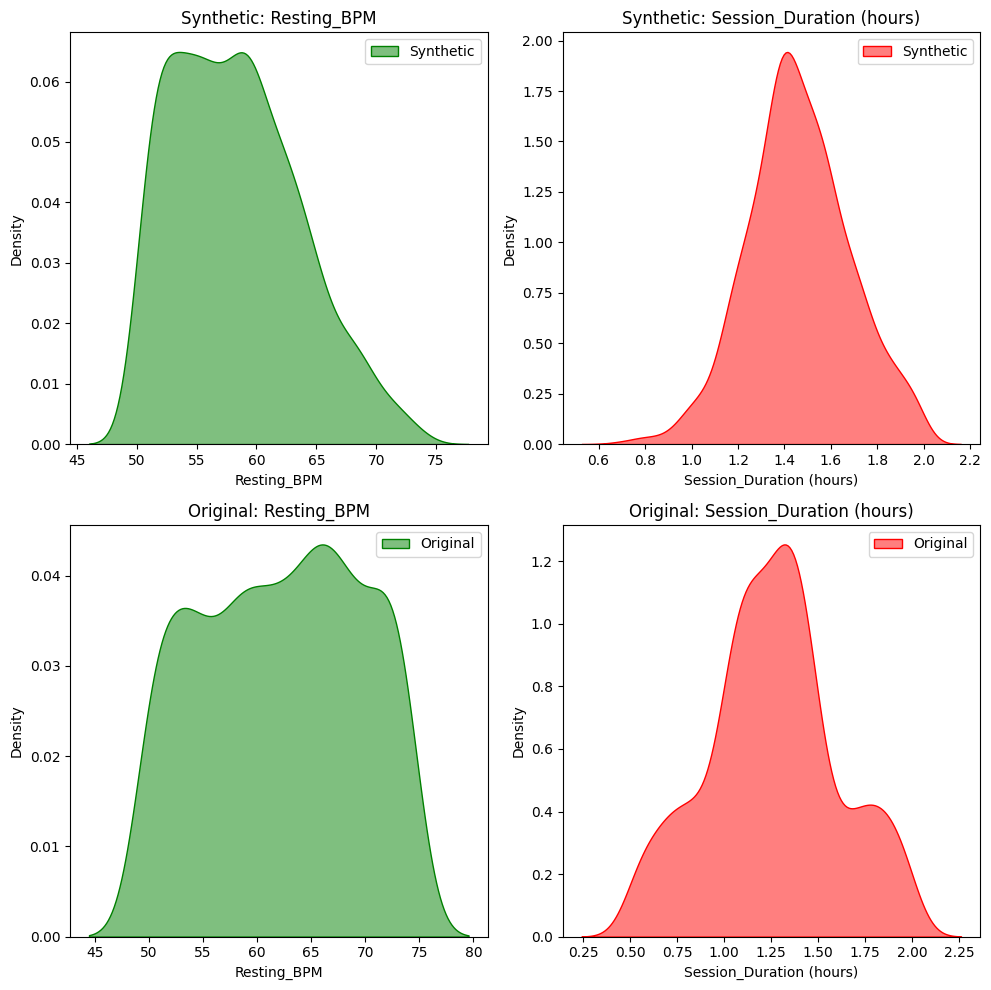

In [ ]:
#Creating a subplot grid with 2 rows and 2 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Resting_BPM', 'Session_Duration (hours)']
colors = ['green', 'red']

#Plotting KDE plots for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame distribution plot
    sns.kdeplot(
        synthetic_df[feature],
        ax=axes[0, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Synthetic"
    )
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Density")
    axes[0, idx].legend()

    #Original DataFrame distribution plot
    sns.kdeplot(
        df[feature],
        ax=axes[1, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Original"
    )
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Density")
    axes[1, idx].legend()

#Adjust layout
plt.tight_layout()
plt.show()

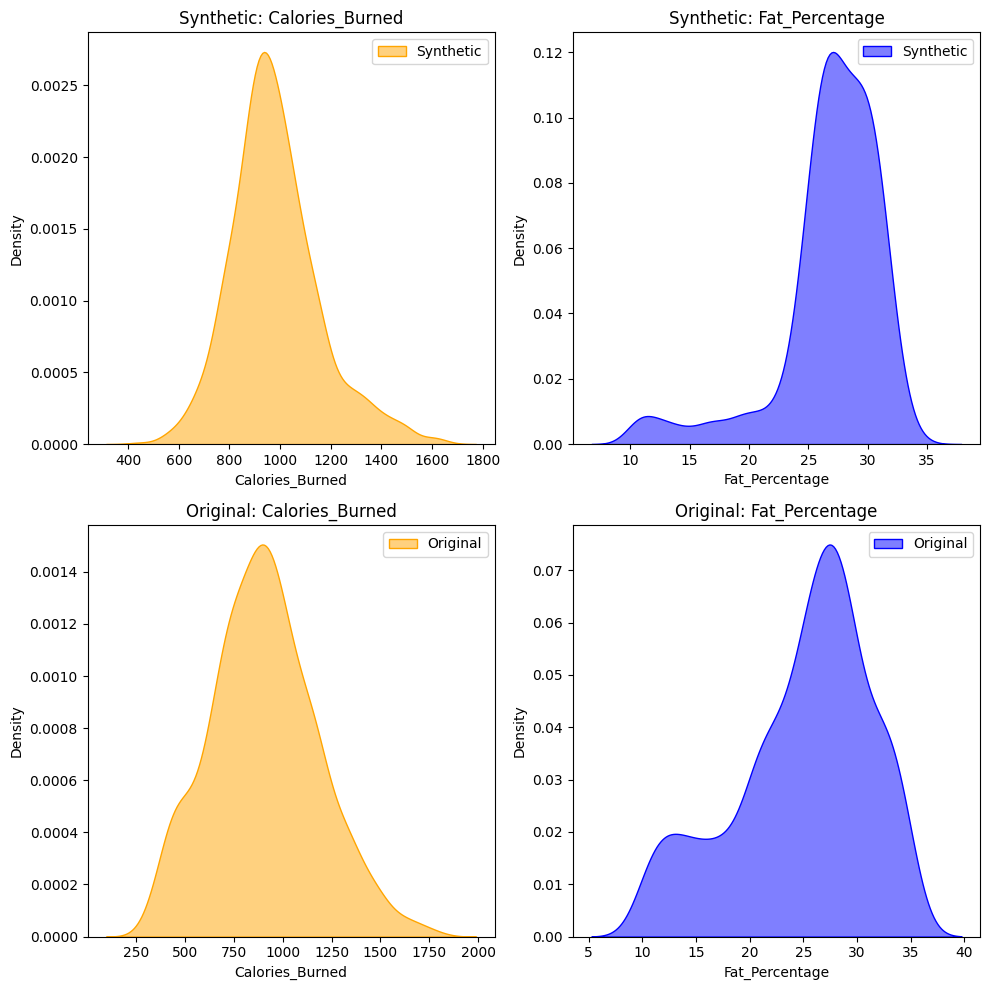

In [ ]:
#Creating a subplot grid with 2 rows and 2 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Calories_Burned', 'Fat_Percentage']
colors = ['orange', 'blue']

#Plotting KDE plots for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame distribution plot
    sns.kdeplot(
        synthetic_df[feature],
        ax=axes[0, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Synthetic"
    )
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Density")
    axes[0, idx].legend()

    #Original DataFrame distribution plot
    sns.kdeplot(
        df[feature],
        ax=axes[1, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Original"
    )
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Density")
    axes[1, idx].legend()

#Adjust layout
plt.tight_layout()
plt.show()

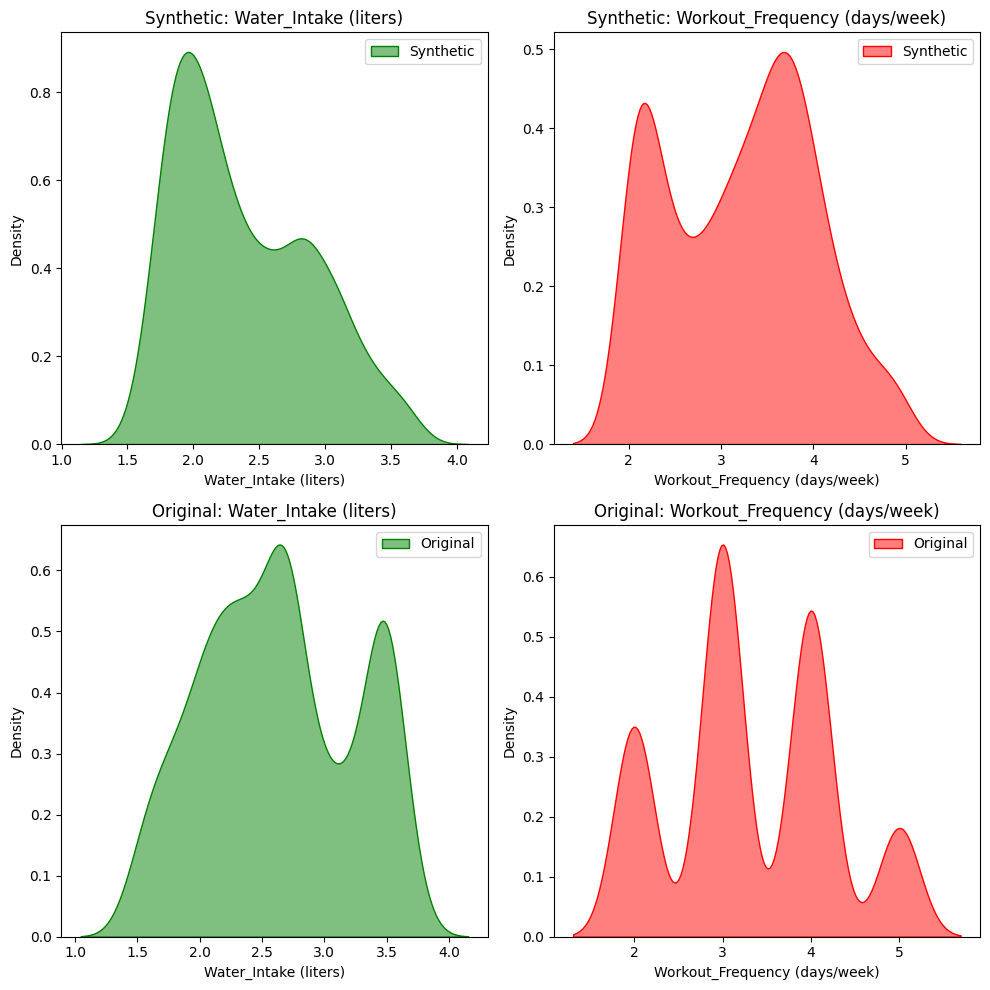

In [ ]:
#Creating a subplot grid with 2 rows and 2 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Water_Intake (liters)',	'Workout_Frequency (days/week)']
colors = ['green', 'red']

#Plotting KDE plots for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame distribution plot
    sns.kdeplot(
        synthetic_df[feature],
        ax=axes[0, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Synthetic"
    )
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Density")
    axes[0, idx].legend()

    #Original DataFrame distribution plot
    sns.kdeplot(
        df[feature],
        ax=axes[1, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Original"
    )
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Density")
    axes[1, idx].legend()

#Adjust layout
plt.tight_layout()
plt.show()

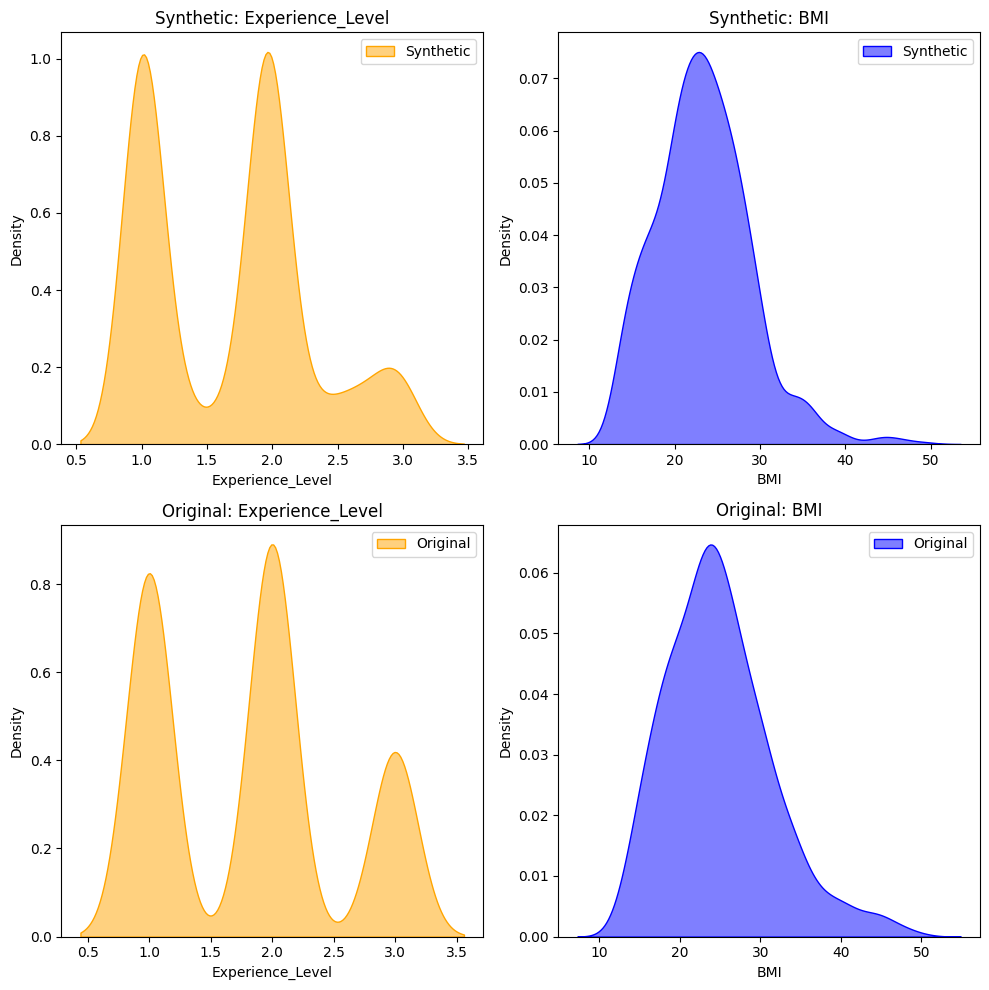

In [ ]:
#Creating a subplot grid with 2 rows and 2 columns for side-by-side comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#Features to plot
features = ['Experience_Level',	'BMI']
colors = ['orange', 'blue']

#Plotting KDE plots for synthetic_df and df
for idx, feature in enumerate(features):
    #Synthetic DataFrame distribution plot
    sns.kdeplot(
        synthetic_df[feature],
        ax=axes[0, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Synthetic"
    )
    axes[0, idx].set_title(f"Synthetic: {feature}")
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Density")
    axes[0, idx].legend()

    #Original DataFrame distribution plot
    sns.kdeplot(
        df[feature],
        ax=axes[1, idx],
        color=colors[idx],
        fill=True,
        alpha=0.5,
        label="Original"
    )
    axes[1, idx].set_title(f"Original: {feature}")
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel("Density")
    axes[1, idx].legend()

#Adjust layout
plt.tight_layout()
plt.show()

## **5.5 Combining Synthetic Data and Raw Data**

In [ ]:
new_df = pd.concat([df_fix, synthetic_df], axis=0)
new_df

Weight (kg)  Height (m)     Max_BPM     Avg_BPM  Resting_BPM  \
0      88.300000    1.710000  180.000000  157.000000    60.000000   
1      74.900000    1.530000  179.000000  151.000000    66.000000   
2      68.100000    1.660000  167.000000  122.000000    54.000000   
3      53.200000    1.700000  190.000000  164.000000    56.000000   
4      46.100000    1.790000  188.000000  158.000000    68.000000   
..           ...         ...         ...         ...          ...   
995    91.369759    1.898639  192.046356  121.706848    57.355698   
996    47.484085    1.531423  182.879150  120.416283    64.392715   
997    50.837700    1.509564  163.327057  125.513664    64.807190   
998    63.439610    1.509920  160.846466  122.654503    51.371098   
999    50.356133    1.577356  164.461884  148.616608    56.849030   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                    1.690000      1313.000000       12.600000   
1                    1.300000       883.000000       33.900000   
2                    1.110000       677.000000       33.400000   
3                    0.590000       532.000000       28.800000   
4                    0.640000       556.000000       29.200000   
..                        ...              ...             ...   
995                  1.376515       932.717590       25.911690   
996                  1.401035       853.341736       29.836803   
997                  1.689851      1118.750610       30.108223   
998                  1.740780      1093.215332       30.686972   
999                  1.538307      1152.103516       29.055092   

     Water_Intake (liters)  Workout_Frequency (days/week)  ...  Age_young  \
0                 3.500000                       4.000000  ...        0.0   
1                 2.100000                       4.000000  ...        0.0   
2                 2.300000                       4.000000  ...        0.0   
3                 2.100000                       3.000000  ...        1.0   
4                 2.800000                       3.000000  ...        0.0   
..                     ...                            ...  ...        ...   
995               3.147084                       3.240669  ...        0.0   
996               2.424912                       2.107412  ...        0.0   
997               1.845109                       3.651286  ...        0.0   
998               1.863797                       3.087971  ...        0.0   
999               1.885957                       2.510346  ...        1.0   

      Gender_Male  Workout_Type_HIIT  Workout_Type_Strength  \
0    1.000000e+00                0.0               0.000000   
1    0.000000e+00                1.0               0.000000   
2    0.000000e+00                0.0               0.000000   
3    1.000000e+00                0.0               1.000000   
4    1.000000e+00                0.0               1.000000   
..            ...                ...                    ...   
995  1.000000e+00                1.0               0.000000   
996  1.758337e-06                1.0               0.000000   
997  5.960464e-08                0.0               0.000000   
998  0.000000e+00                0.0               0.999998   
999  0.000000e+00                0.0               0.060234   

     Workout_Type_Yoga  Obesity_Level_Obesity I  Obesity_Level_Obesity II  \
0         1.000000e+00             1.000000e+00              0.000000e+00   
1         0.000000e+00             1.000000e+00              0.000000e+00   
2         0.000000e+00             0.000000e+00              0.000000e+00   
3         0.000000e+00             0.000000e+00              0.000000e+00   
4         0.000000e+00             0.000000e+00              0.000000e+00   
..                 ...                      ...                       ...   
995       5.960464e-08             1.096726e-01              1.529905e-02   
996       0.000000e+00             2.980232e-08              5.960464e-08   
997     

## **5.6 Splitting the Data into Training and Test Sets**

In [ ]:
X = new_df.drop(columns = 'Calories_Burned')
y = new_df['Calories_Burned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
standardized = StandardScaler()
train_s = standardized.fit_transform(X_train)
test_s = standardized.transform(X_test)

# **6. Model Training**

## **6.1 Baseline Model - Linear Regression**

In [ ]:
model_LR = LinearRegression()
model_LR.fit(train_s, y_train)
y_pred = model_LR.predict(test_s)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print("Slope:", model_LR.coef_[0])
print("Intercept:", model_LR.intercept_)

Mean Squared Error: 3042.5125
R-squared: 0.9477
Slope: -28.32536401495329
Intercept: 940.1687345903636


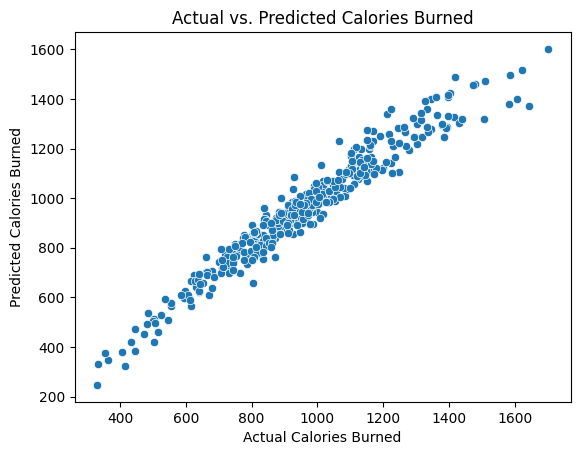

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs. Predicted Calories Burned")
plt.show()

## **6.2 Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(random_state=0)
model_RF.fit(X_train, y_train)

y_pred = model_RF.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 3257.0544
R-squared: 0.9440


## **6.3 Neural Networks (multi-layer perceptron)**

In [ ]:
# Convert to tensor
train_features_tensor = torch.tensor(train_s, dtype=torch.float32)
train_labels_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
test_features_tensor = torch.tensor(test_s, dtype=torch.float32)
test_labels_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
input_dim = train_features_tensor.shape[1]


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
                    nn.Linear(input_dim,128), nn.ReLU(),
                    nn.Linear(128,256), nn.ReLU(),
                    nn.Linear(256,1))

    def forward(self, x):
        return self.network(x)

def init_weights(m):
    if type(m) == nn.Linear or type(m) == nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

model_mlp = MLP(input_dim)
model_mlp.apply(init_weights)

MLP(
  (network): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [ ]:
num_epochs = 150
batch_size = 64
learning_rate = 0.1

train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
train_iter = DataLoader(train_dataset, batch_size, shuffle=True)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_mlp.parameters(), lr = learning_rate)

# Train the MLP model
for epoch in range(num_epochs):
    for X1,y1 in train_iter:
        optimizer.zero_grad()
        loss = criterion(model_mlp(X1), y1)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 30 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [30/150], Loss: 6639.7090
Epoch [60/150], Loss: 2563.1328
Epoch [90/150], Loss: 3696.2976
Epoch [120/150], Loss: 2232.6750
Epoch [150/150], Loss: 641.3078


In [ ]:
model_mlp.eval()
with torch.no_grad():
    test_pred = model_mlp(test_features_tensor)
    mse = criterion(test_pred, test_labels_tensor)
    r2 = r2_score(test_pred, test_labels_tensor)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 3702.3259
R-squared: 0.9306


In [ ]:
# Create a PyTorch wrapper (easy for comparing models by cross validation at the end)
from sklearn.base import BaseEstimator, RegressorMixin

class PyTorchMLP(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.model = MLP(input_dim).apply(init_weights)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr = 0.1)
        self.epochs = 150
        self.batch_size = 64


    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)
        train_dataset = TensorDataset(X_tensor, y_tensor)
        train_iter = DataLoader(train_dataset, self.batch_size, shuffle=True)

        for epoch in range(self.epochs):
          for X1,y1 in train_iter:
            self.model.train()
            self.optimizer.zero_grad()
            loss = self.criterion(self.model(X1), y1)
            loss.backward()
            self.optimizer.step()
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X)
            return self.model(X_tensor).numpy()

## **6.4 Extreme Gradient Boosting (XGBoost)**

In [ ]:
from xgboost import XGBRegressor

# Train the XGBoost model
model_xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model_xgb.fit(train_s, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model_xgb.predict(test_s)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 2270.4028
R-squared: 0.9610


## **6.5 Comparing Models: Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    'Linear Regression': model_LR,
    'Random Forests': model_RF,
    'Neural Network': PyTorchMLP(input_dim),
    'XGBoost Regressor': model_xgb
}

# Evaluate each model using cross-validation
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, train_s, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_results[model_name] = {
        'mean_score': -np.mean(scores),
        'std_score': np.std(scores)
    }

cv_results

{'Linear Regression': {'mean_score': 3162.223031007989,
  'std_score': 347.6643955576071},
 'Random Forests': {'mean_score': 3122.571569586161,
  'std_score': 338.97303005835215},
 'Neural Network': {'mean_score': 3988.7748810079042,
  'std_score': 180.27011930313117},
 'XGBoost Regressor': {'mean_score': 2264.733340221339,
  'std_score': 289.9269228243975}}

## **6.6 Automated machine learning (AutoML)**

In [ ]:
!pip install autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

# Train the AutoML model
predictor = TabularPredictor(label = 'Calories_Burned').fit(train_data = new_df)

# Make predictions
predictions = predictor.predict(X_test)

# Evaluate the model
performance = predictor.evaluate_predictions(y_true = y_test, y_pred = predictions)
print(performance)

No path specified. Models will be saved in: "AutogluonModels/ag-20241130_204920"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.25 GB / 12.67 GB (88.8%)
Disk Space Avail:   74.20 GB / 107.72 GB (68.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

{'root_mean_squared_error': -43.30128727773236, 'mean_squared_error': -1875.0014799087062, 'mean_absolute_error': -32.00633313142801, 'r2': 0.9677859786564116, 'pearsonr': 0.9842305142153122, 'median_absolute_error': -25.158447265625}


## **6.7 Model Comparision**

<ipython-input-5-264e881ef7ad>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MSE", y="Model", data=results_df, palette="viridis")


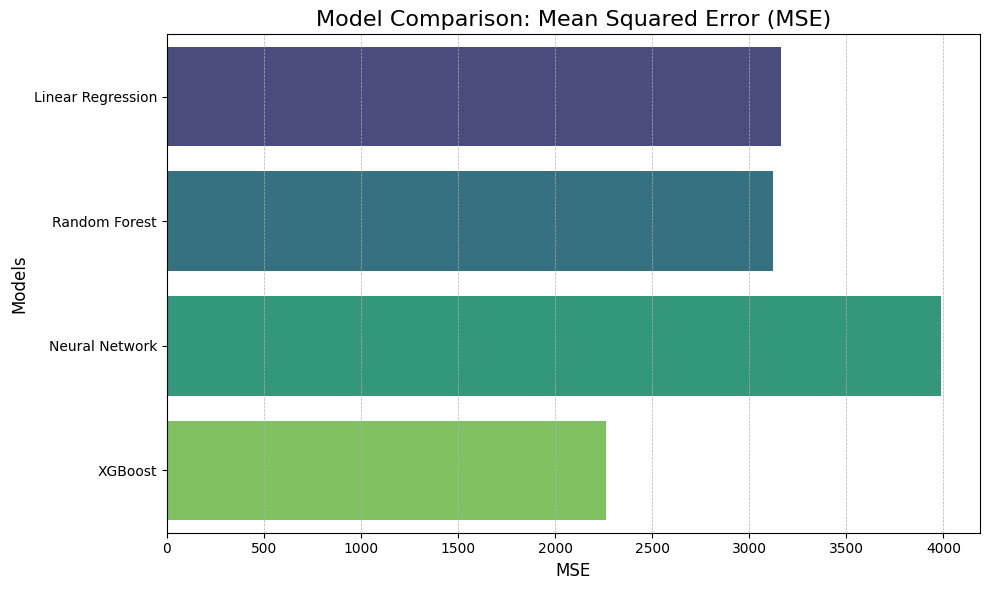

In [5]:
#Simulated dataset details for visuals based on results of different models
data = {
    "Model": ["Linear Regression", "Random Forest", "Neural Network", "XGBoost"],
    "MSE": [3162.22, 3122.57, 3988.77, 2264.73],
    "R_squared": [0.9477, 0.9440, 0.9244, 0.9610]
}

#Creating a DataFrame
results_df = pd.DataFrame(data)

#Bar chart for MSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="MSE", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison: Mean Squared Error (MSE)", fontsize=16)
plt.xlabel("MSE", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.tight_layout()
plt.grid(axis = 'x', linestyle = '--', linewidth = 0.5)
plt.show()